# House price prediction

### Importing required libraries and data set

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/niran/Desktop/My datasets and texts/train.csv')

### A glimpse into the data

In [3]:
pd.set_option('display.max_columns',100)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
pd.set_option('display.max_columns',100)
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [5]:
pd.set_option('display.max_columns',100)
df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
330    331          90       RL          NaN    10624   Pave   NaN      IR1   
856    857          80       RL          NaN    10970   Pave   NaN      IR1   
1369  1370          20       RL         48.0    10635   Pave   NaN      IR2   
597    598         120       RL         53.0     3922   Pave   NaN      Reg   
360    361          85       RL          NaN     7540   Pave   NaN      IR1   
1404  1405          50       RL         60.0    10410   Pave  Grvl      Reg   
1120  1121          30       RM         59.0     8263   Pave   NaN      Reg   
1269  1270          50       RL         78.0    11344   Pave   NaN      Reg   
1078  1079         120       RM         37.0     4435   Pave   NaN      Reg   
718    719          60       RL         96.0    10542   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
330          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
856          Low    AllPub    Inside       Mod      CollgCr       Norm   
1369         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
597          Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   
360          Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
1404         Lvl    AllPub    Corner       Gtl      OldTown     Artery   
1120         Bnk    AllPub    Inside       Mod       IDOTRR       Norm   
1269         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1078         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
718          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
330        Norm   Duplex     1Story            5            4       1964   
856        Norm     1Fam       SLvl            6            6       1978   
1369       Norm     1Fam     1Story            8            5       2003   
597        Norm   TwnhsE     1Story            7            5       2006   
360        Norm     1Fam     SFoyer            6            6       1978   
1404       Norm     1Fam     1.5Fin            3            4       1915   
1120       Norm     1Fam     1Story            6            5       1920   
1269       Norm     1Fam     1.5Fin            5            5       1958   
1078       Norm   TwnhsE     1Story            6            5       2004   
718        Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
330           1964     Gable  CompShg     HdBoard     HdBoard    BrkFace   
856           1978     Gable  CompShg     Plywood     HdBoard       None   
1369          2003       Hip  CompShg     VinylSd     VinylSd    BrkFace   
597           2007     Gable  CompShg     VinylSd     VinylSd    BrkFace   
360           1978     Gable  CompShg     VinylSd     VinylSd       None   
1404          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1120          1950     Gable  CompShg     BrkFace     BrkFace       None   
1269          1958     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1078          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   
718           1994       Hip  CompShg     Wd Sdng     ImStucc    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
330         84.0        TA        TA     CBlock       TA       TA   
856          0.0        TA        TA     CBlock       Gd       Gd   
1369       171.0        Gd        TA      PConc       Gd       TA   
597         72.0        Gd        TA      PConc       Ex       TA   
360          0.0        TA        TA     CBlock       Gd       TA   
1404         0.0        TA        TA      PConc       TA       TA   
1120         0.0        TA        TA     BrkTil       TA       TA   
1269       180.0        TA        TA     CBlock       TA       TA   
1078       169.0        Gd  

### Data Exploration and Cleaning

In [6]:
def explore_data(df):
    pd.set_option('display.max_rows',100)
    pd.set_option('display.max_columns',100)

    #Get the basic information about the dataframe
    print("Data Shape:")
    print(df.shape)

    print("\nData Columns:")
    print(df.columns)
    
    #To print columns with null values
    print("\nColumns with null values\n")
    null_counts=df.isnull().sum()
    features_with_null=null_counts[null_counts>0].index
    print(features_with_null)
    
    print("\nData Info:\n")
    print(df.info())
    
    #Check for missing values
    print("\nMissing values:\n")
    print(df.isnull().sum())
    
    #Check for duplicate rows
    print("\nDuplicate rows\n:")
    print(df.duplicated().sum())
    
    #Explore unique values in all columns
    print("\nUnique values in all columns\n:")
    print(df.nunique())

In [7]:
explore_data(df)

Data Shape:
(1460, 81)

Data Columns:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQ

In [8]:
null_counts=df[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']].isnull().sum()

In [9]:
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)

In [11]:
numeric_features=['LotFrontage','MasVnrArea','GarageYrBlt']
for col in numeric_features:
    df[col].fillna(df[col].mean(),inplace=True)

In [12]:
cat_cols=['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
          'Electrical', 'FireplaceQu', 'GarageType','GarageFinish', 
          'GarageQual', 'GarageCond']
for col in cat_cols:
    df[col].fillna(df[col].mode(),inplace=True)

In [13]:
explore_data(df)

Data Shape:
(1460, 76)

Data Columns:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCo

In [14]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   180.569112   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    23.994583   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1978.506164   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [15]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(include=['int','float']).columns.tolist()
print("\nCategorical columns:\n")
print(cat_cols)
print("\nNumerical columns:\n")
print(num_cols)


Categorical columns:

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical columns:

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclo

In [16]:
for i in cat_cols:
    print(i)
    print(df[i].unique())
    print("\n")

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']


Street
['Pave' 'Grvl']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa']


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope
['Gtl' 'Mod' 'Sev']


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


Exterior1st
['VinylSd' 'MetalS

In [17]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print("\n")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill   

In [18]:
df.drop(['Utilities'],axis=1,inplace=True)
cat_cols=df.select_dtypes(include='object').columns.tolist()

### count plot for categorical

Count plot for: MSZoning


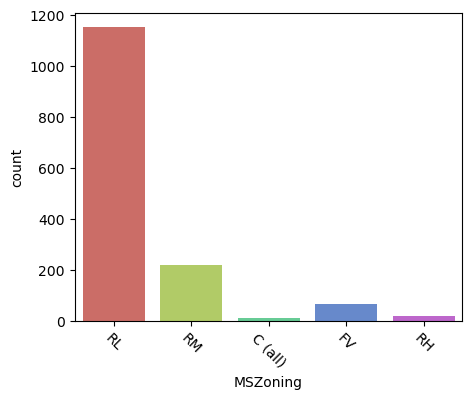



Count plot for: Street


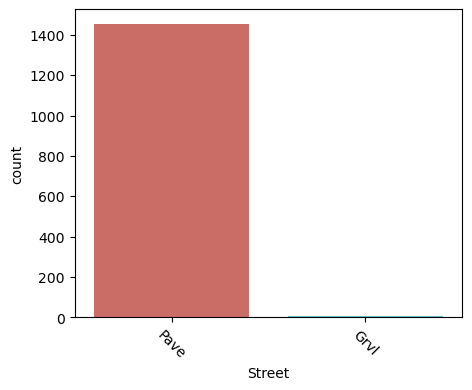



Count plot for: LotShape


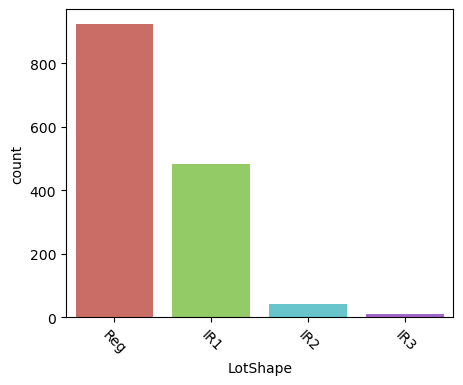



Count plot for: LandContour


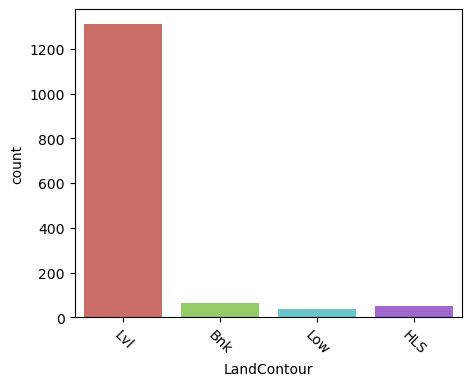



Count plot for: LotConfig


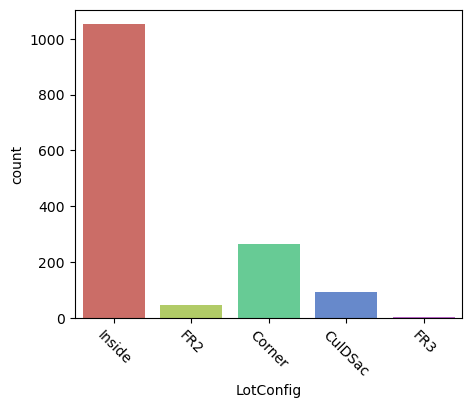



Count plot for: LandSlope


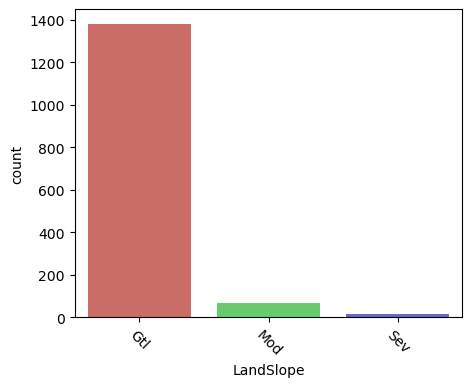



Count plot for: Neighborhood


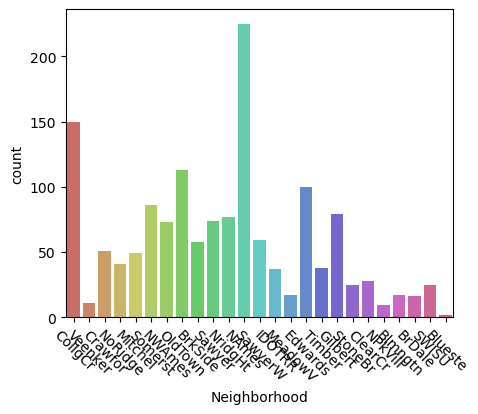



Count plot for: Condition1


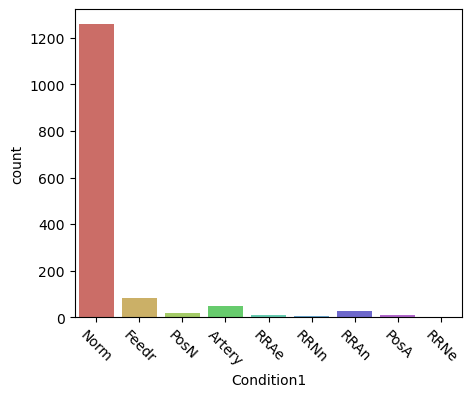



Count plot for: Condition2


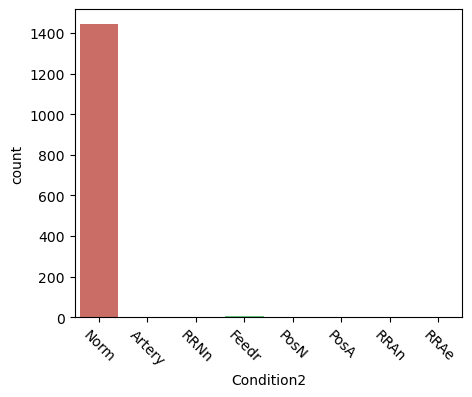



Count plot for: BldgType


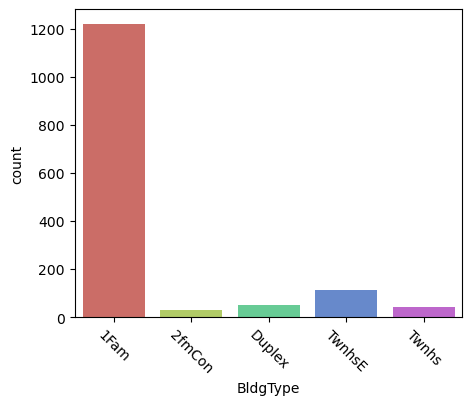



Count plot for: HouseStyle


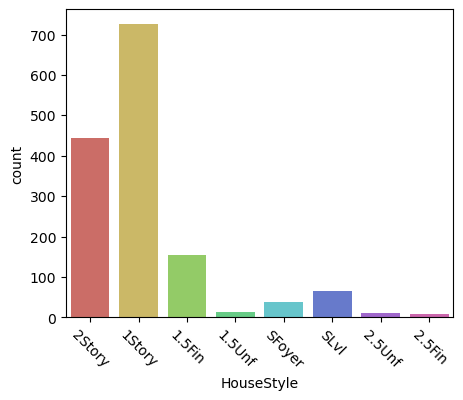



Count plot for: RoofStyle


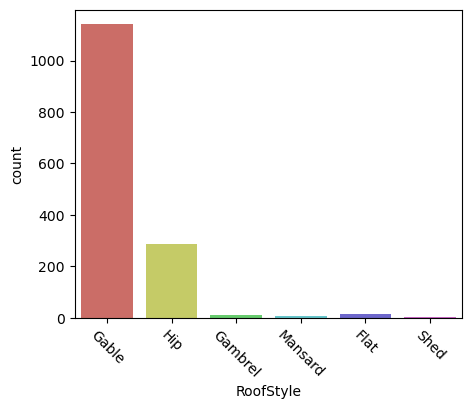



Count plot for: RoofMatl


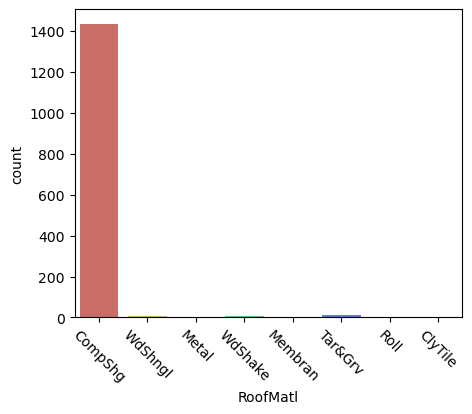



Count plot for: Exterior1st


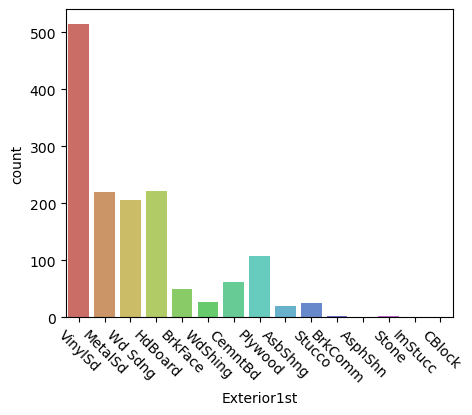



Count plot for: Exterior2nd


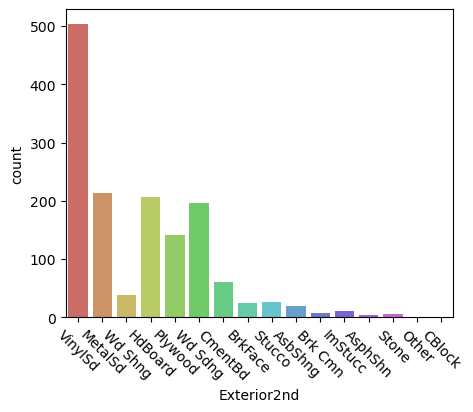



Count plot for: MasVnrType


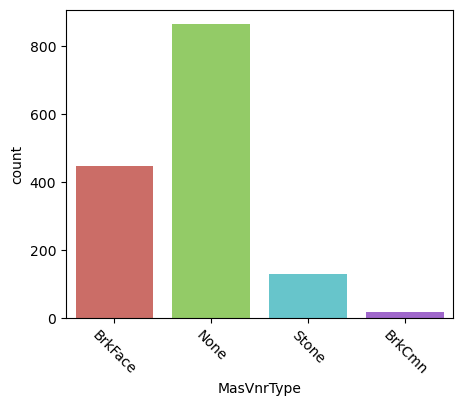



Count plot for: ExterQual


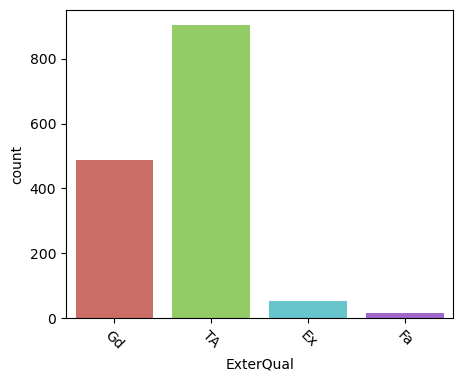



Count plot for: ExterCond


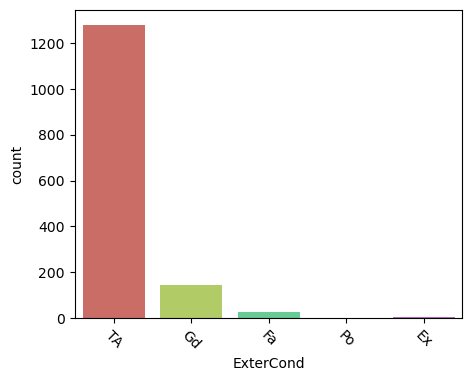



Count plot for: Foundation


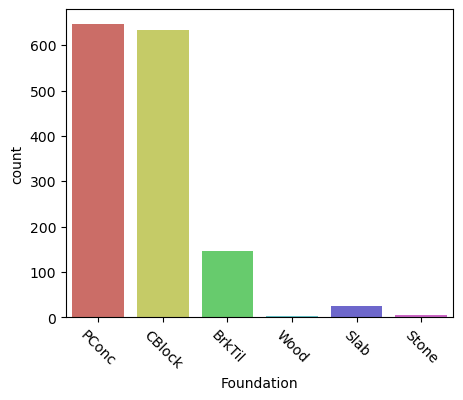



Count plot for: BsmtQual


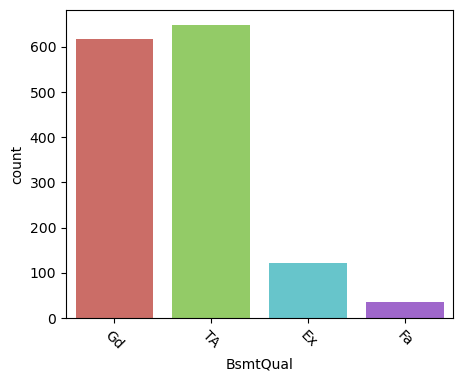



Count plot for: BsmtCond


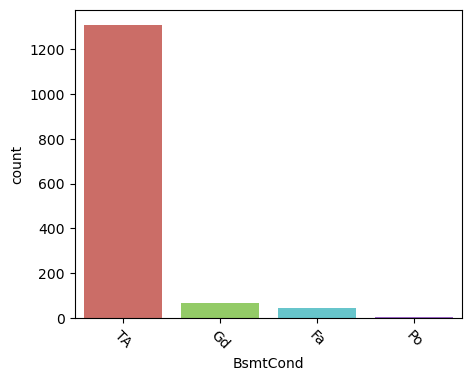



Count plot for: BsmtExposure


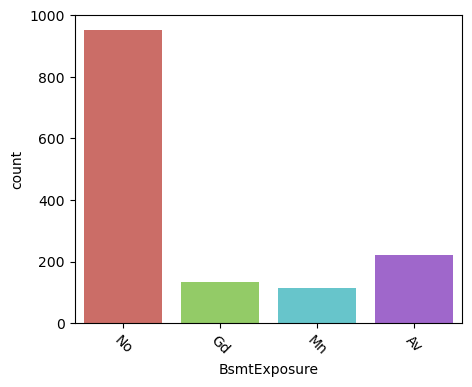



Count plot for: BsmtFinType1


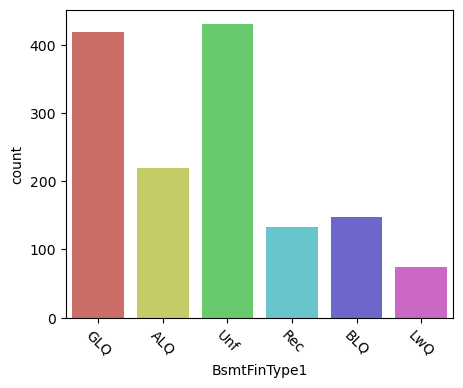



Count plot for: BsmtFinType2


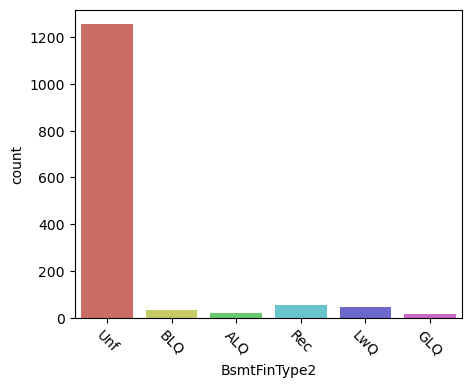



Count plot for: Heating


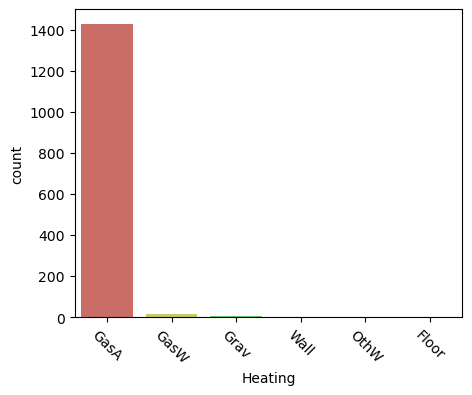



Count plot for: HeatingQC


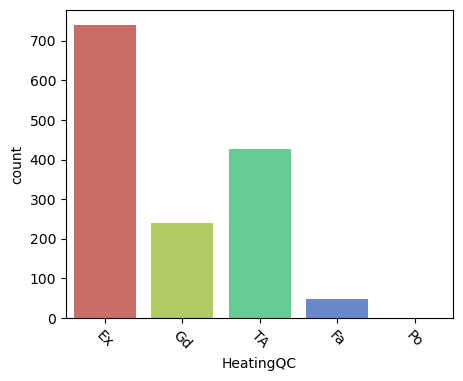



Count plot for: CentralAir


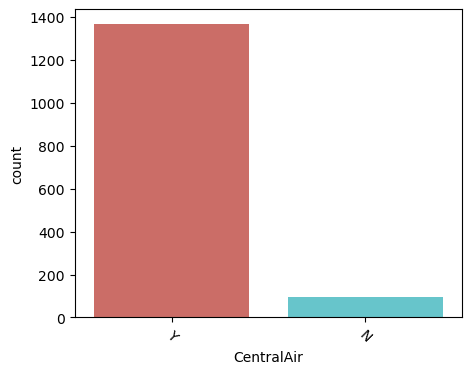



Count plot for: Electrical


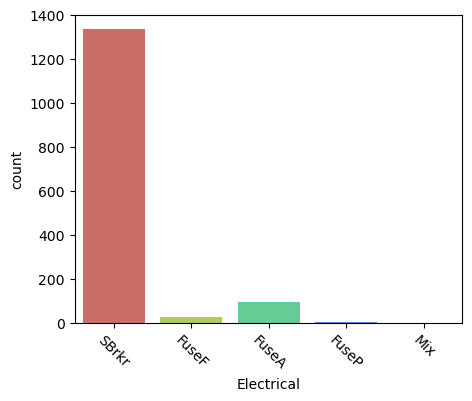



Count plot for: KitchenQual


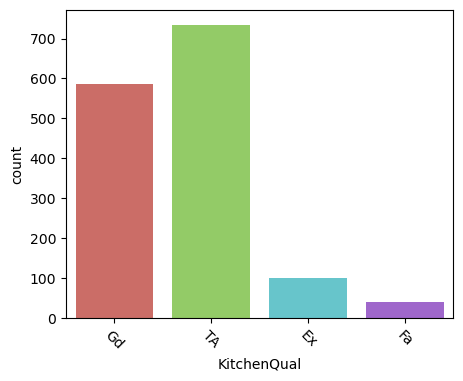



Count plot for: Functional


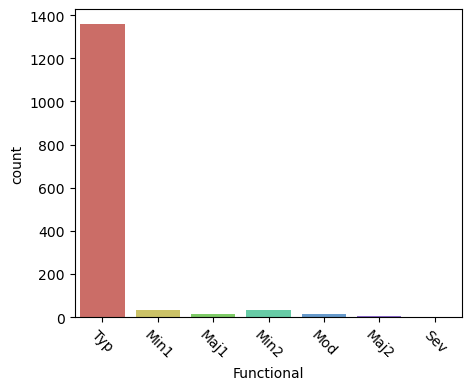



Count plot for: FireplaceQu


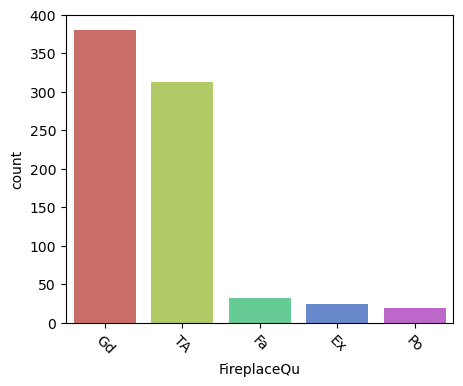



Count plot for: GarageType


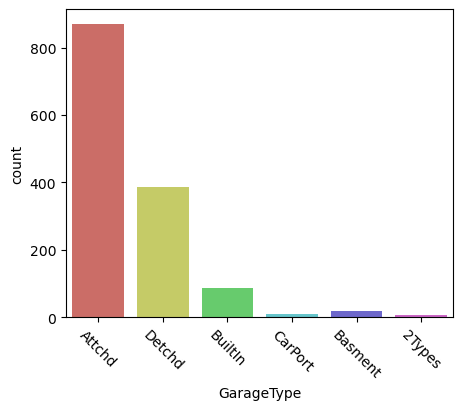



Count plot for: GarageFinish


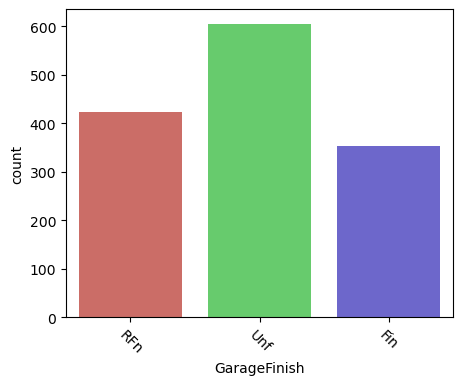



Count plot for: GarageQual


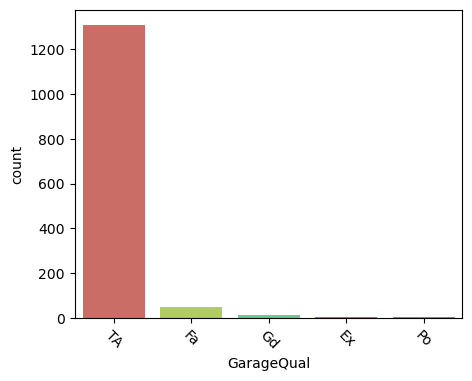



Count plot for: GarageCond


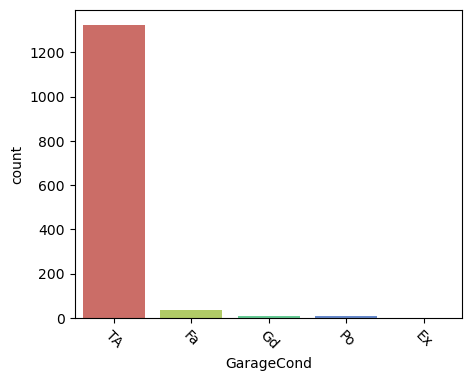



Count plot for: PavedDrive


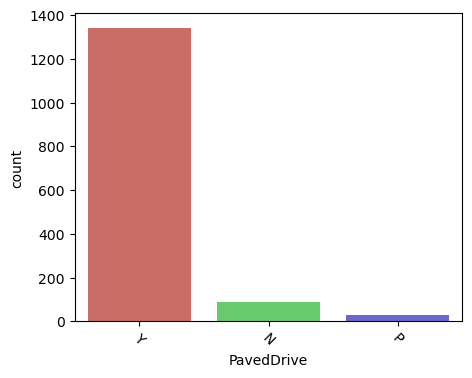



Count plot for: SaleType


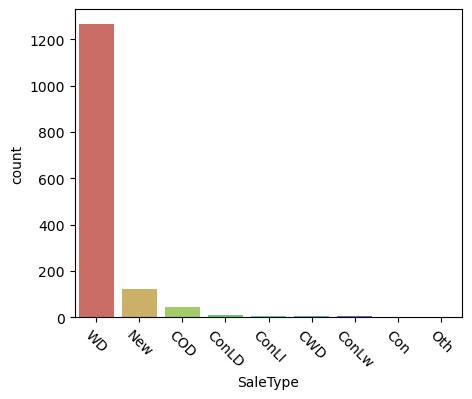



Count plot for: SaleCondition


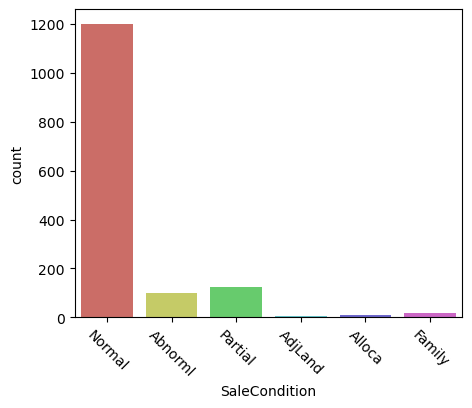

In [19]:
for i in cat_cols:
    print("Count plot for:",i)
    plt.figure(figsize=(5,4))
    sns.countplot(df[i],data=df,palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print("\n")

### histograms and box plots for numerical columns

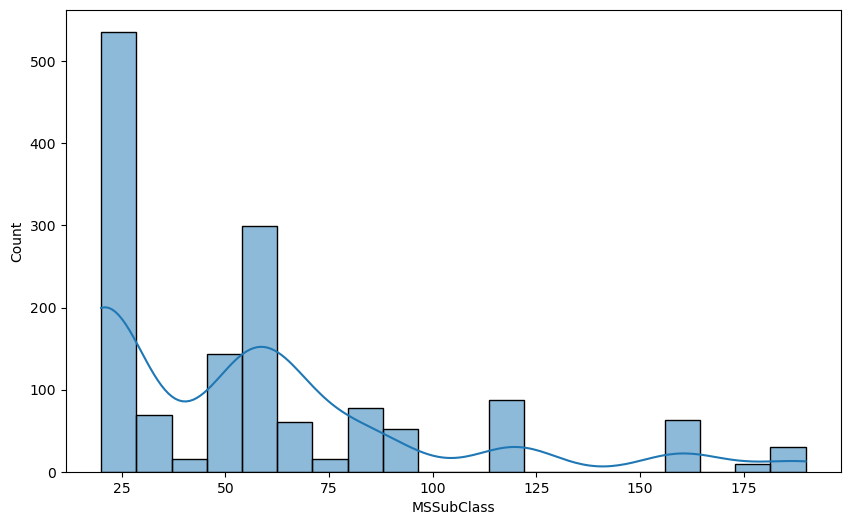

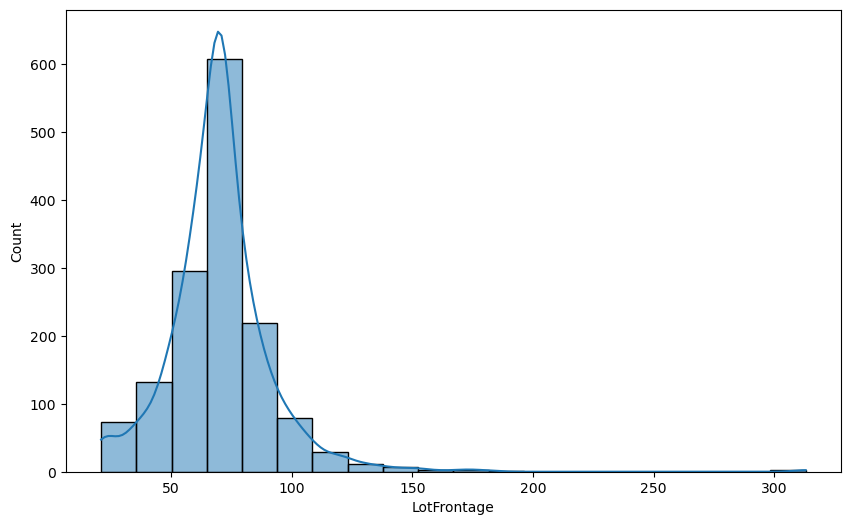

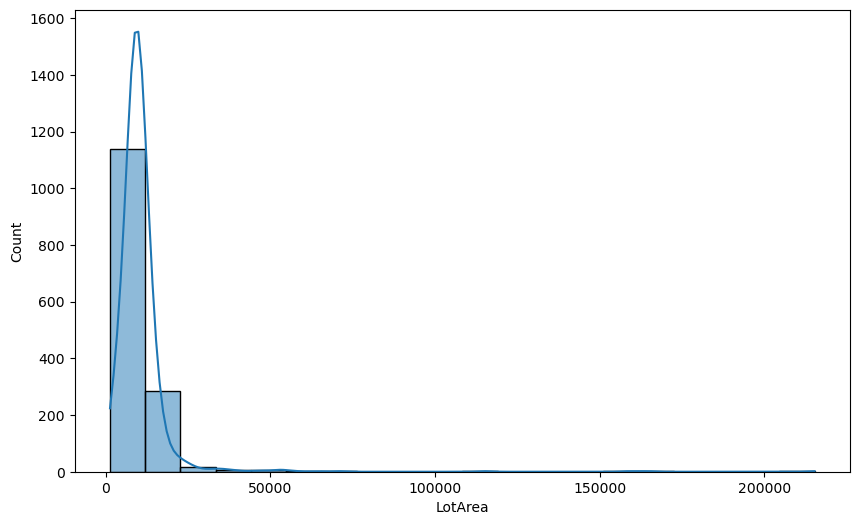

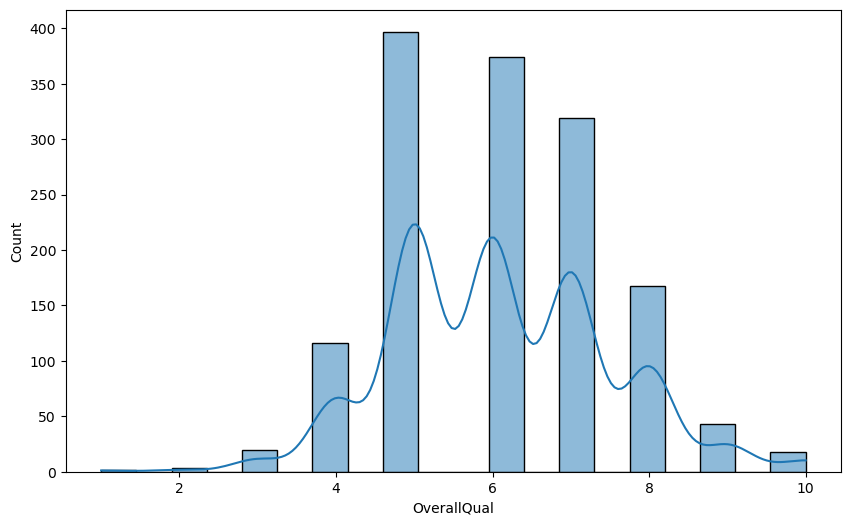

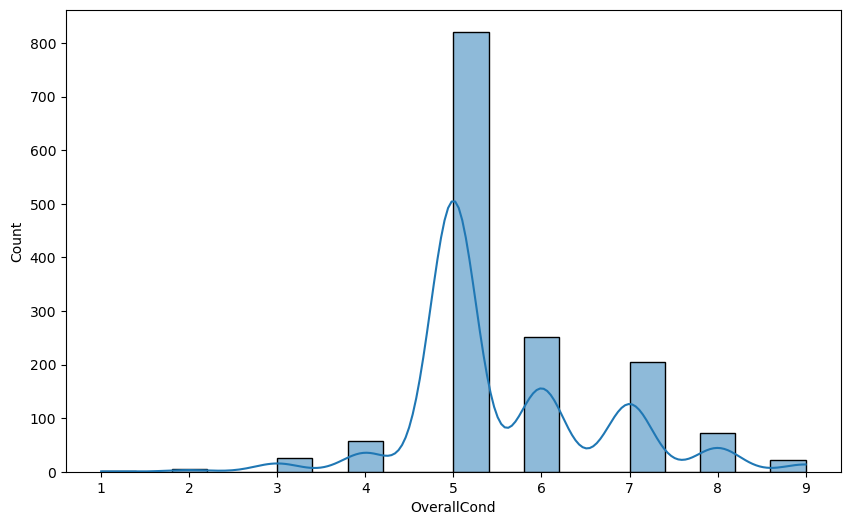

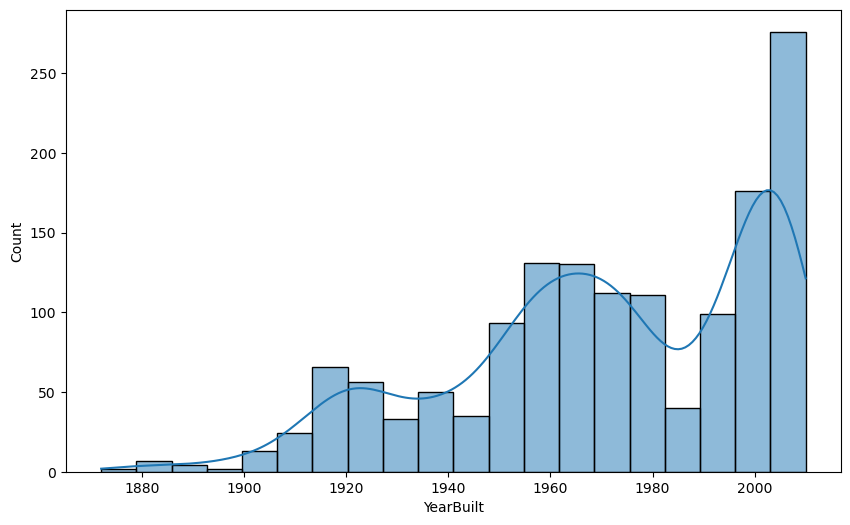

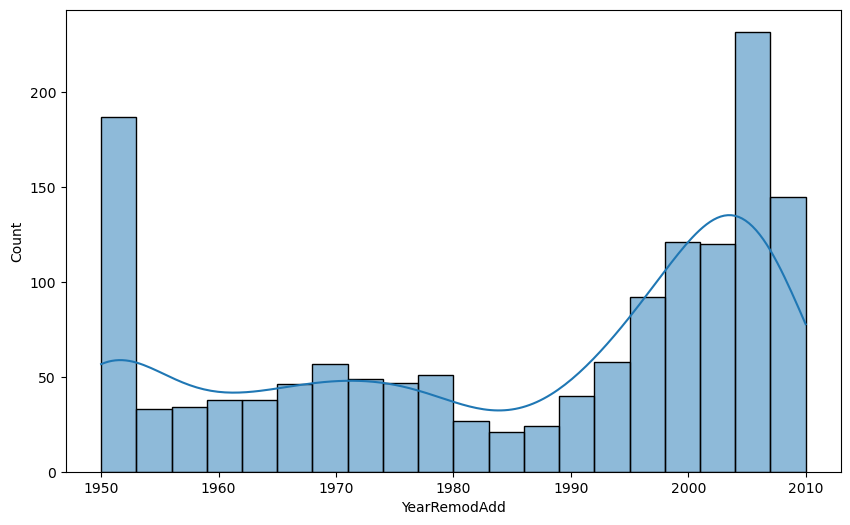

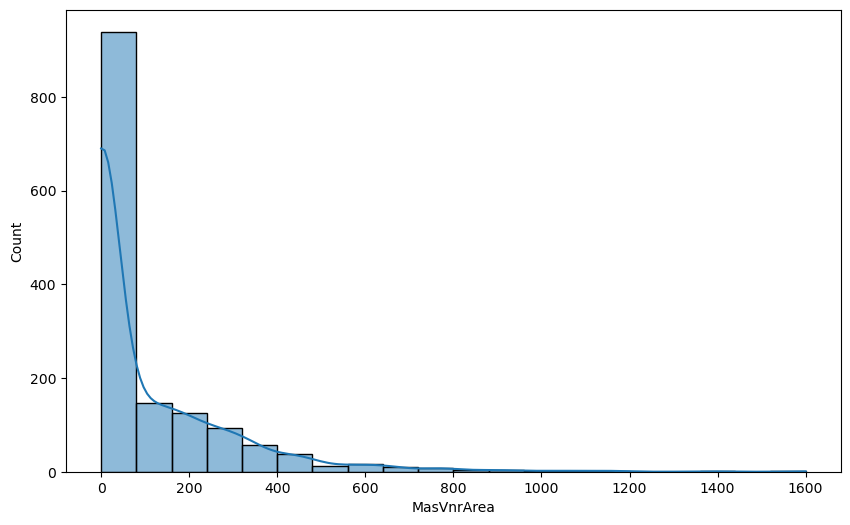

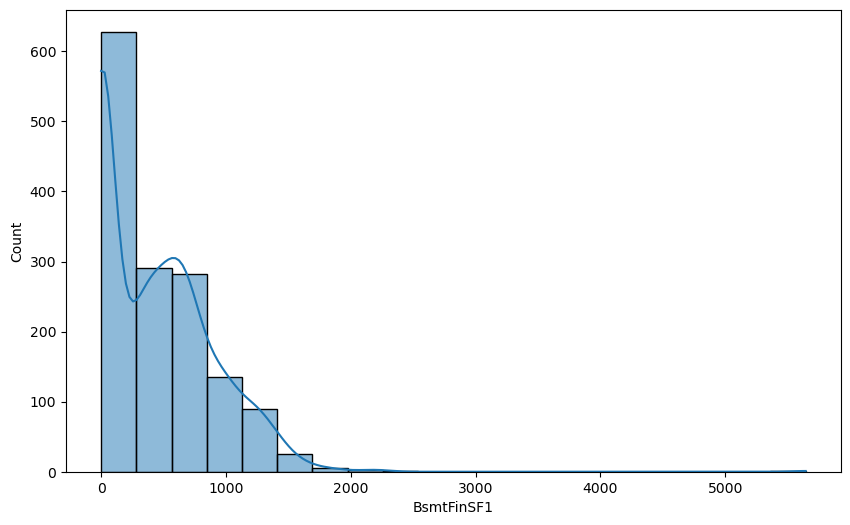

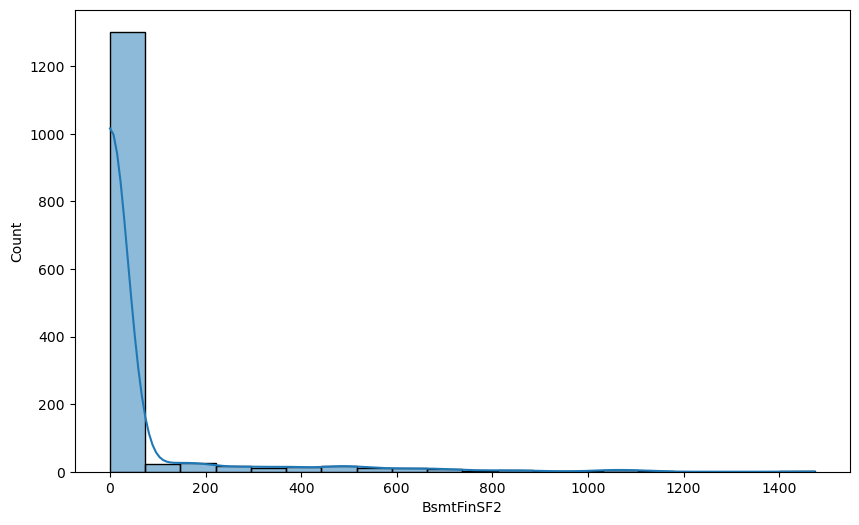

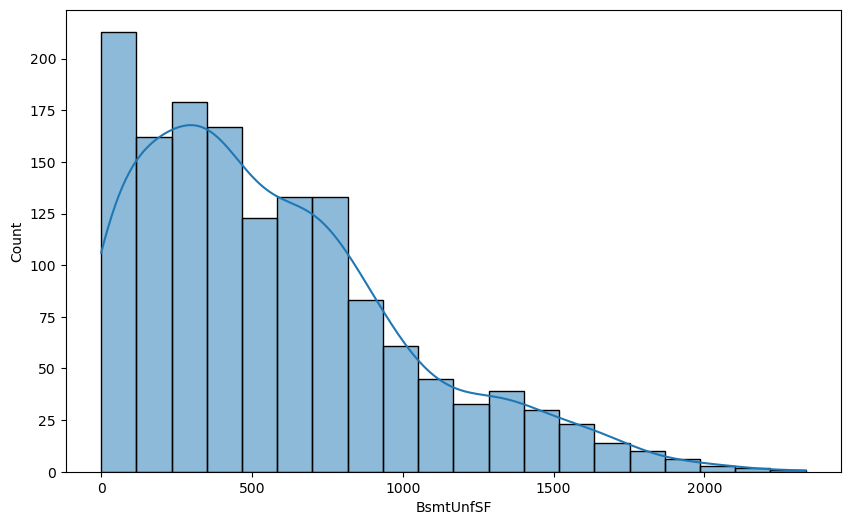

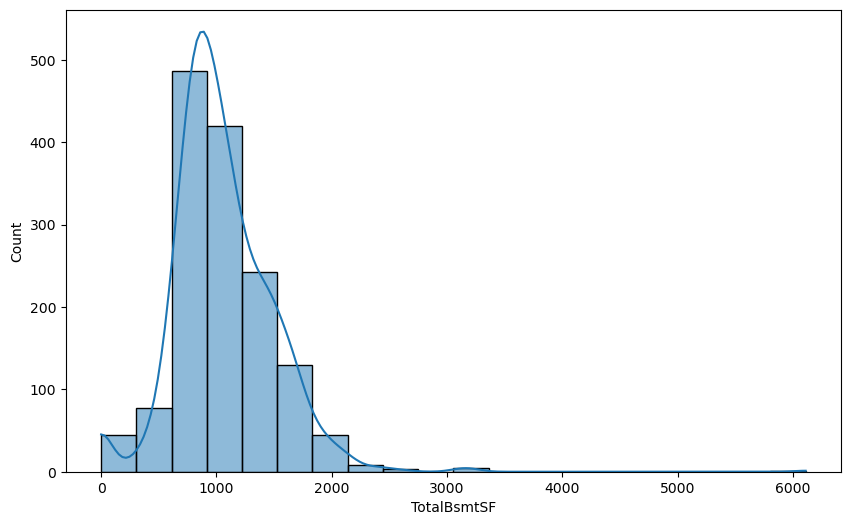

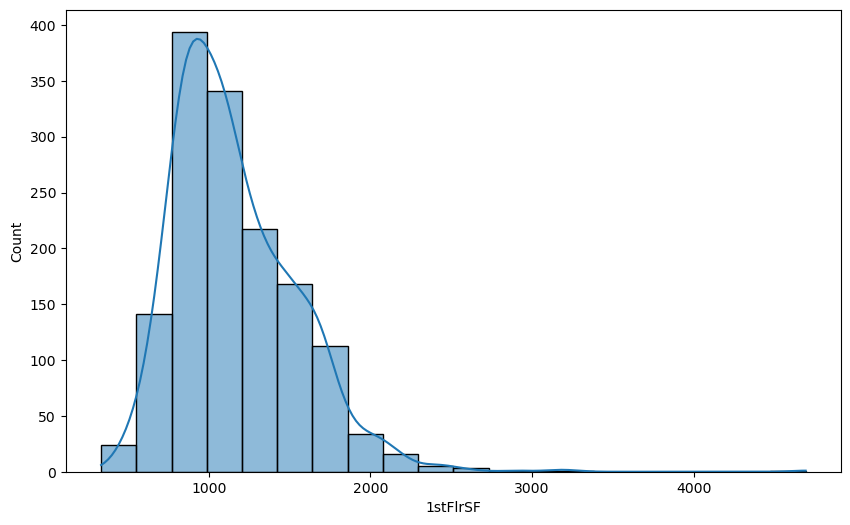

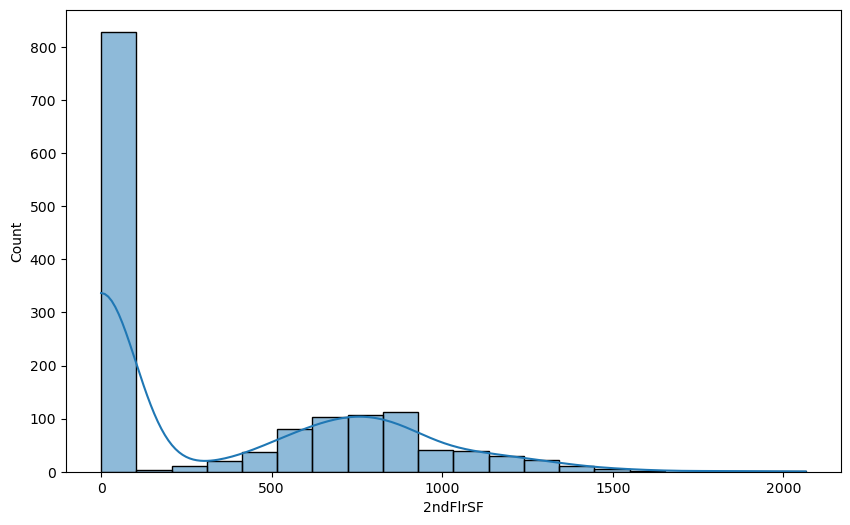

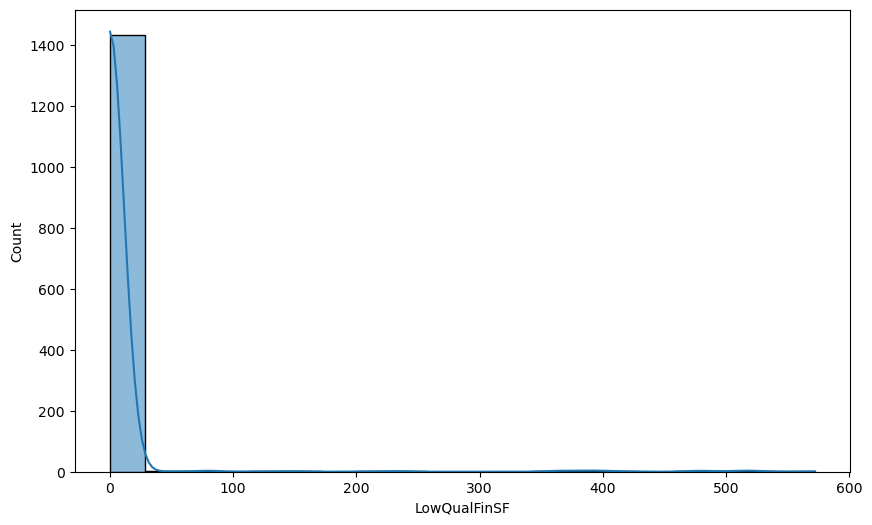

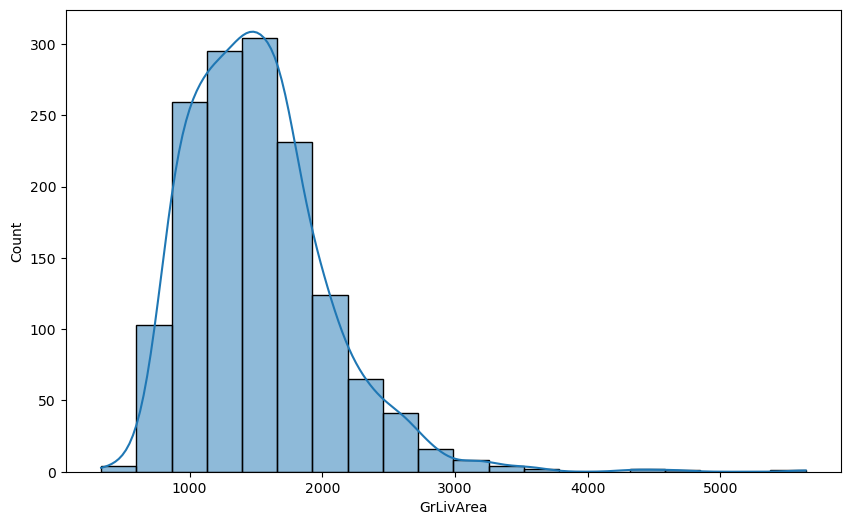

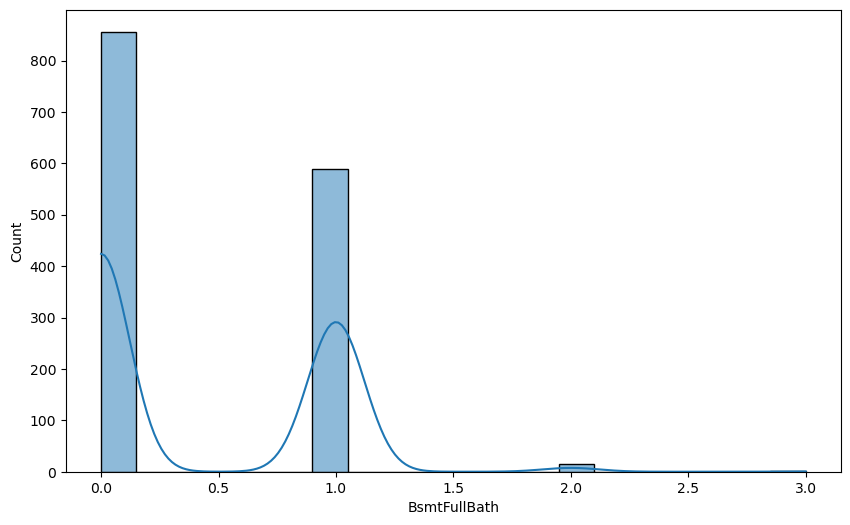

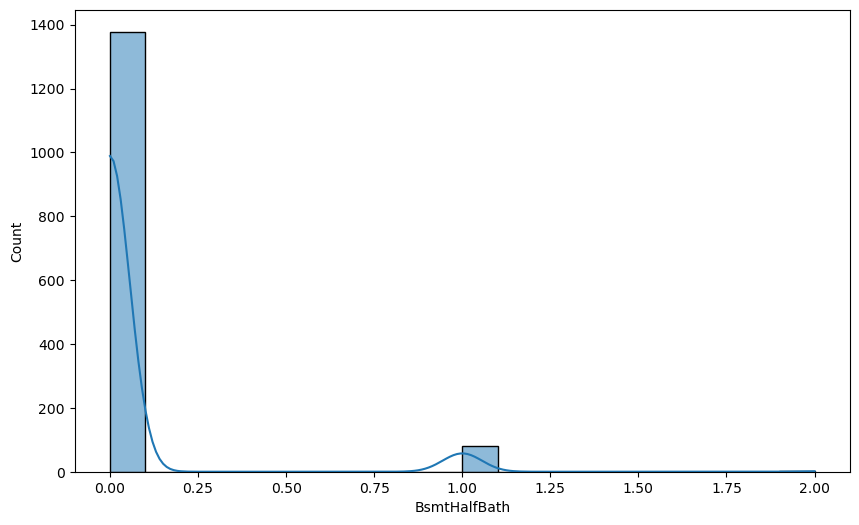

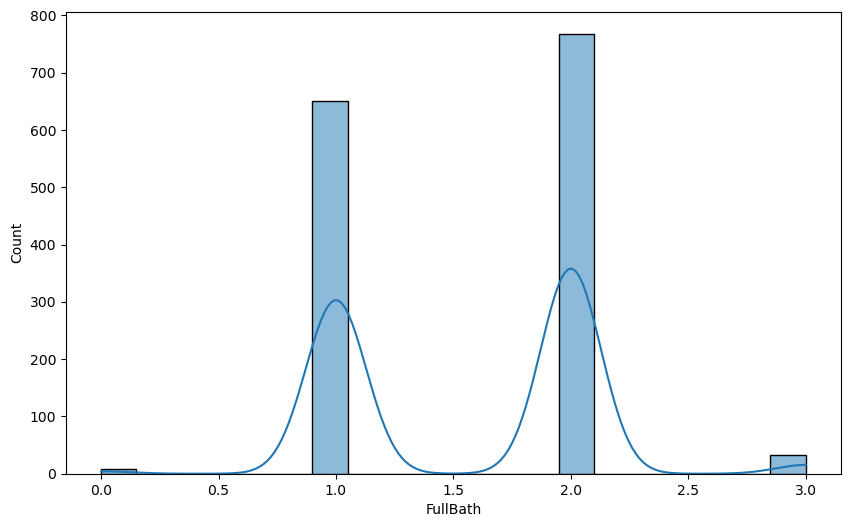

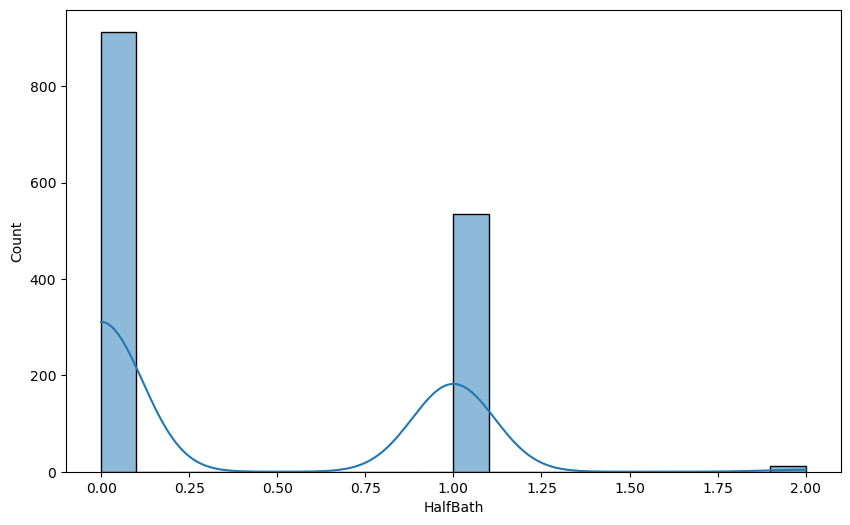

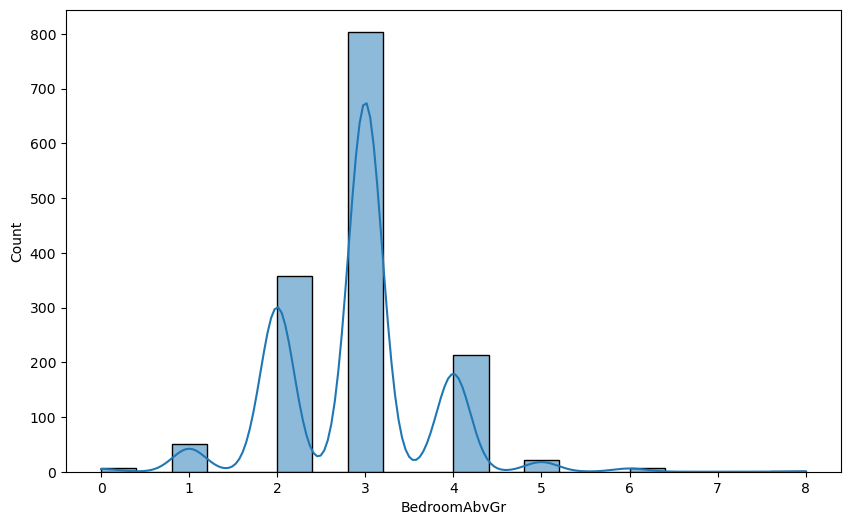

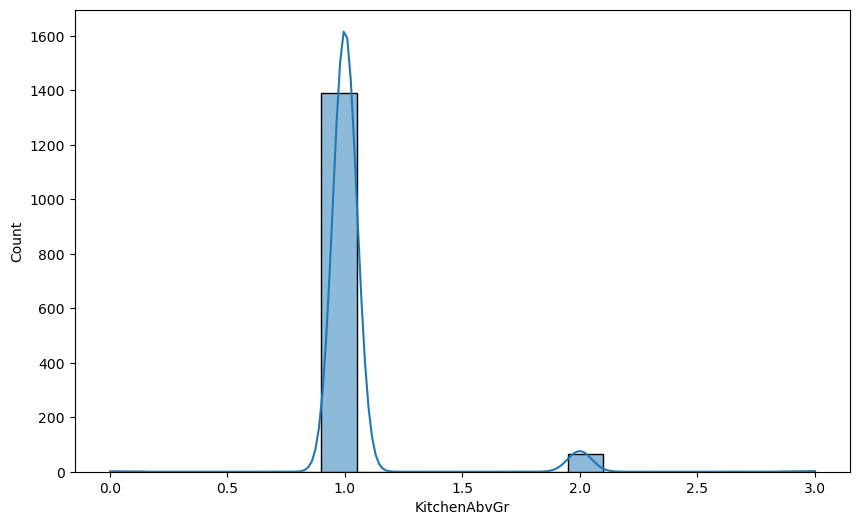

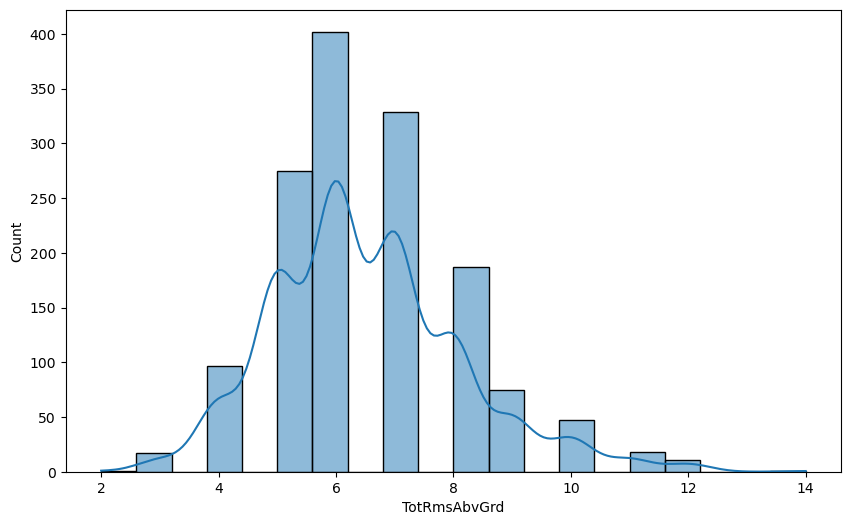

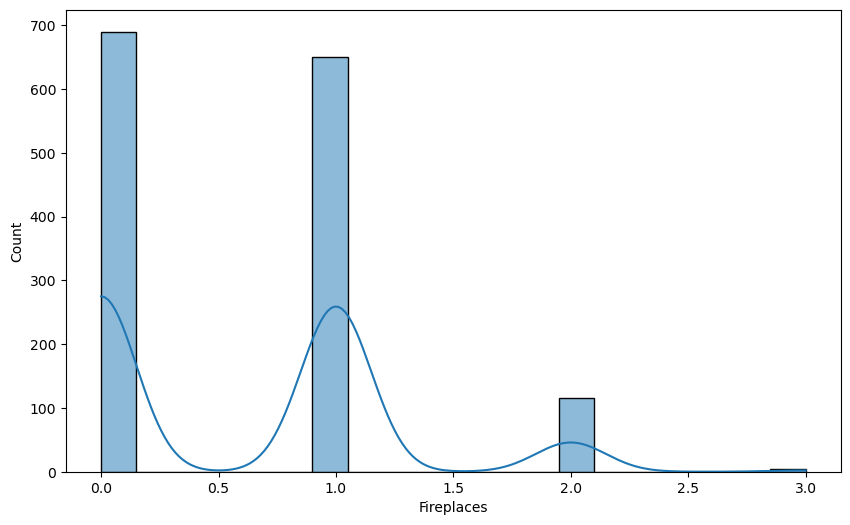

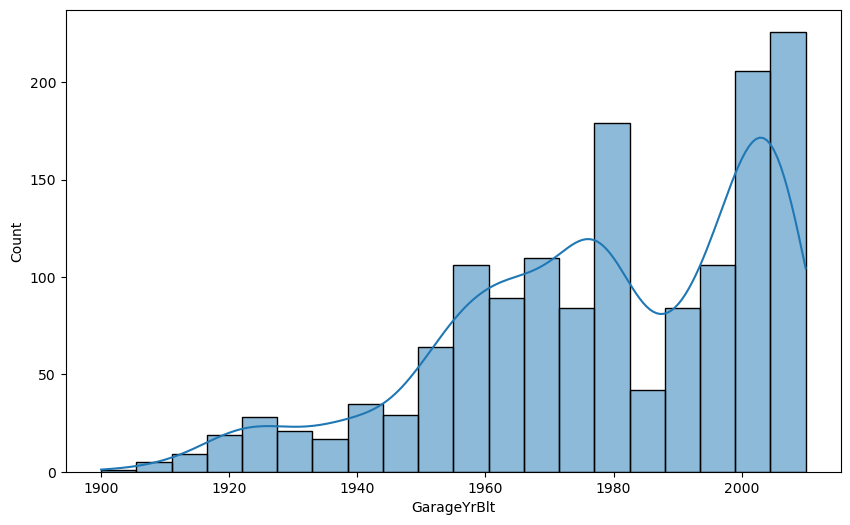

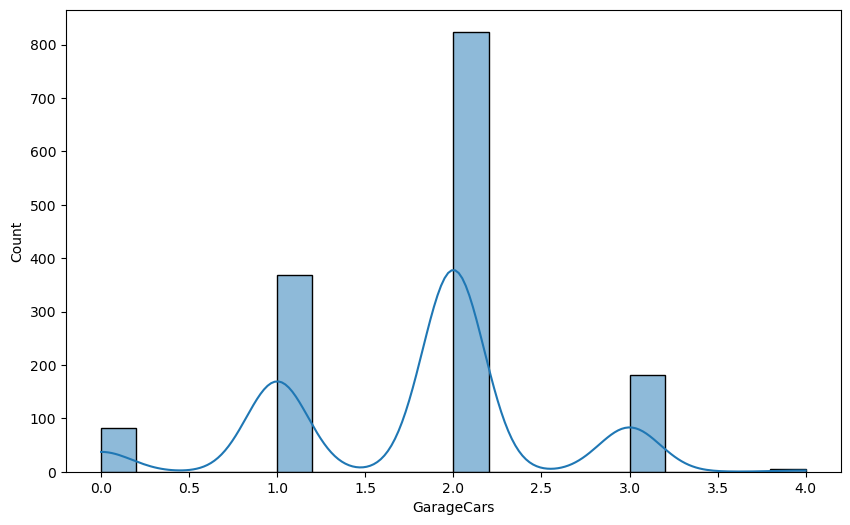

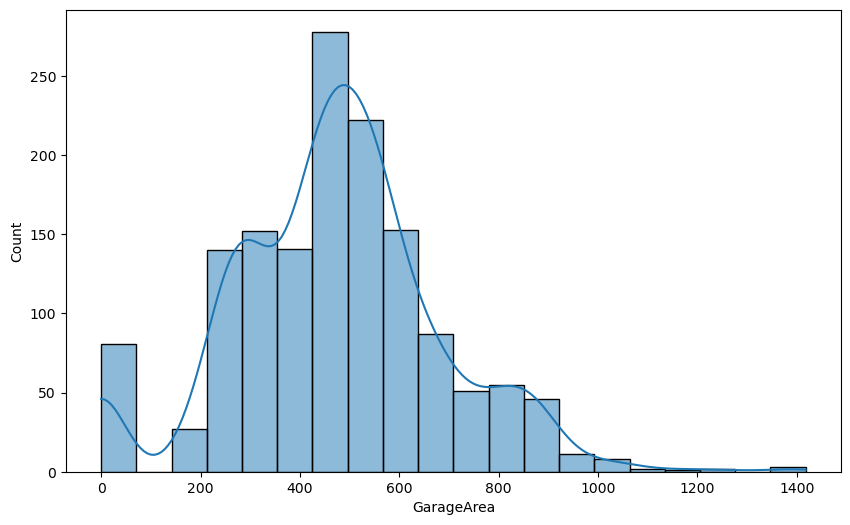

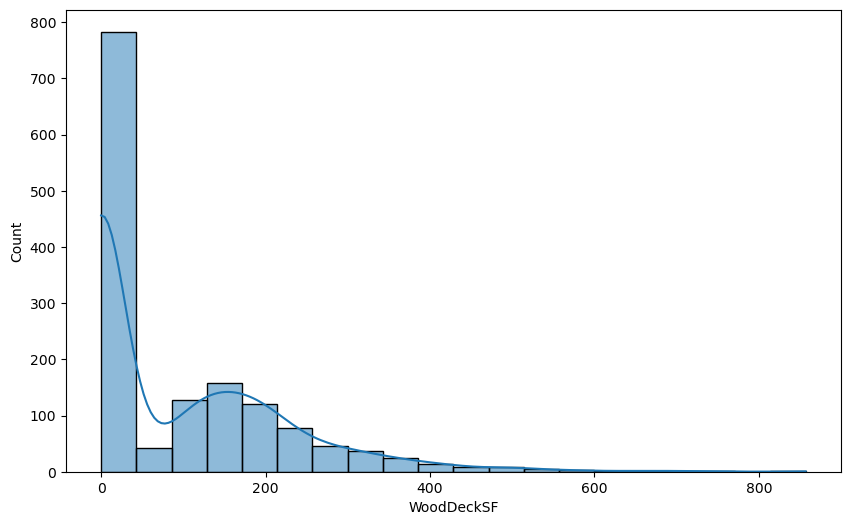

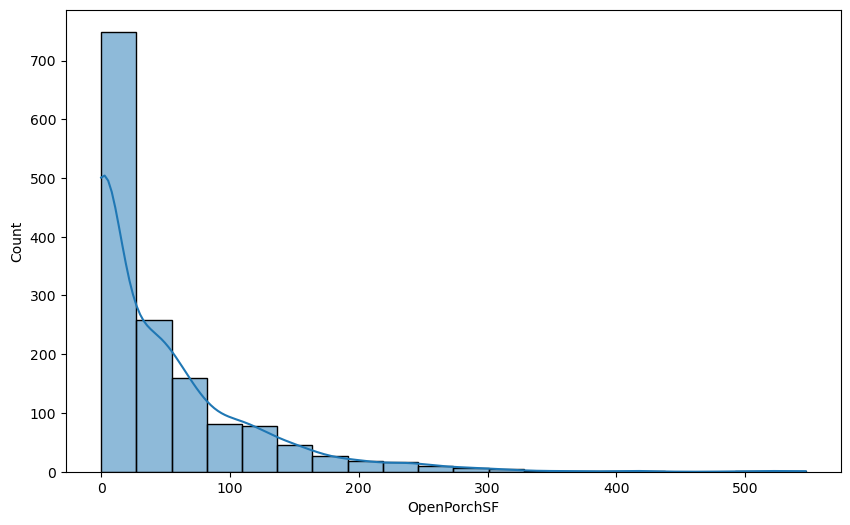

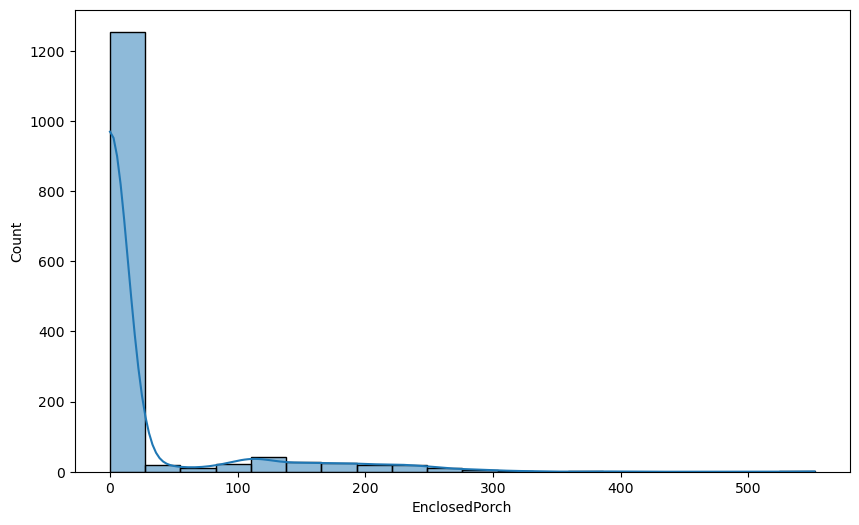

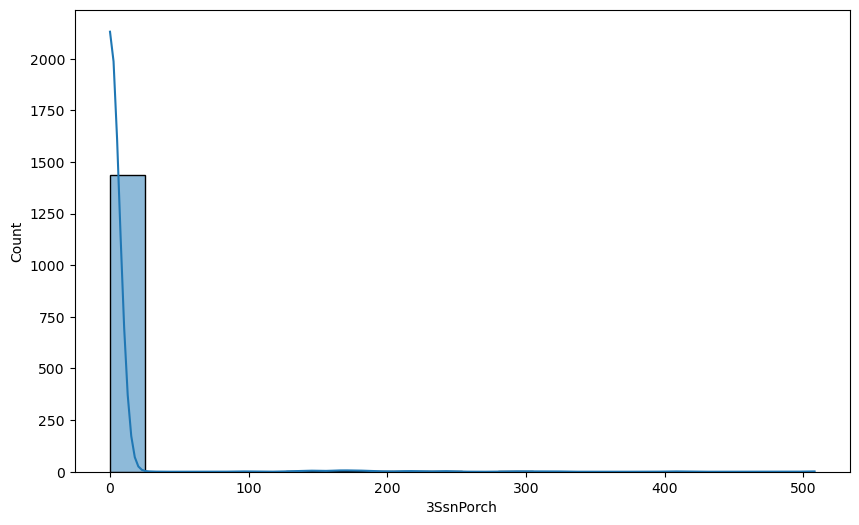

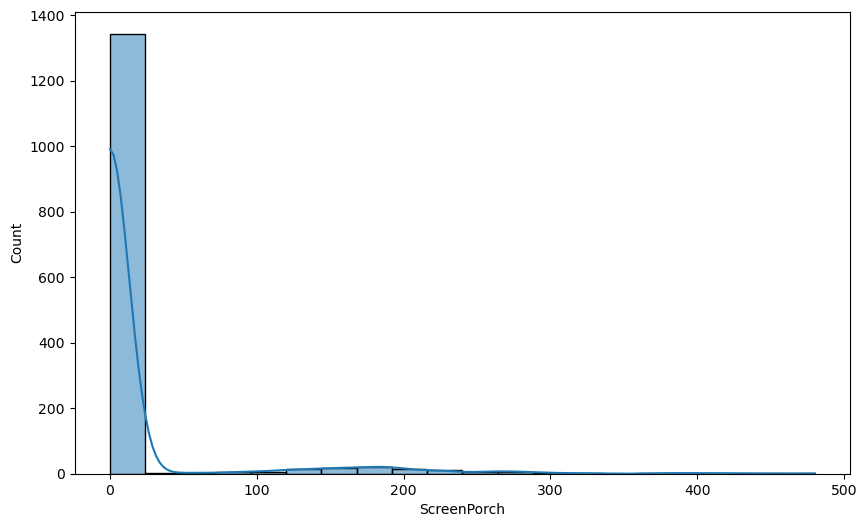

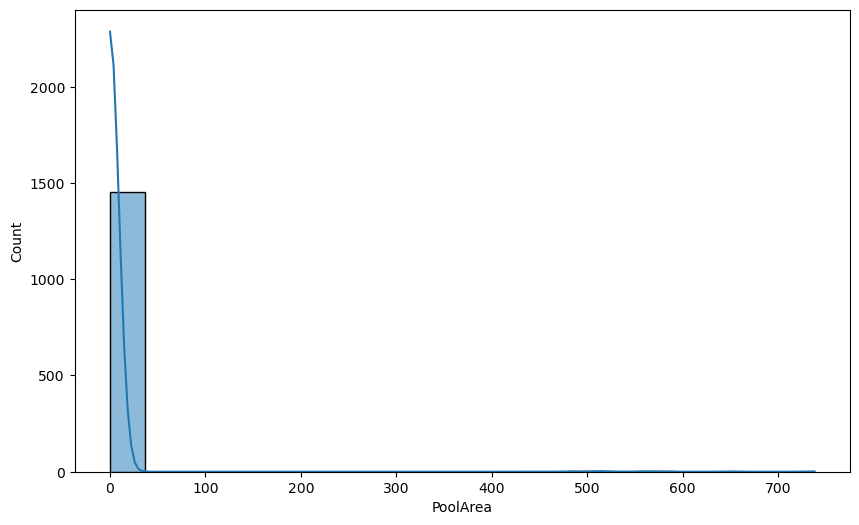

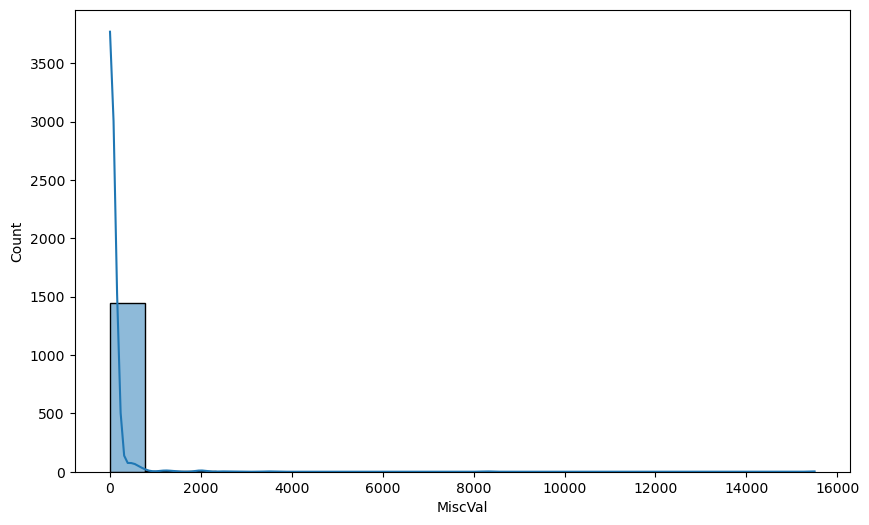

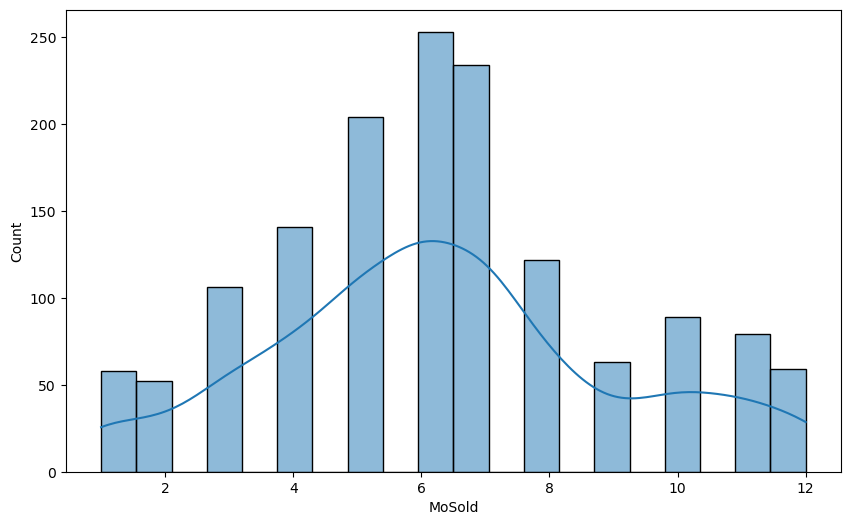

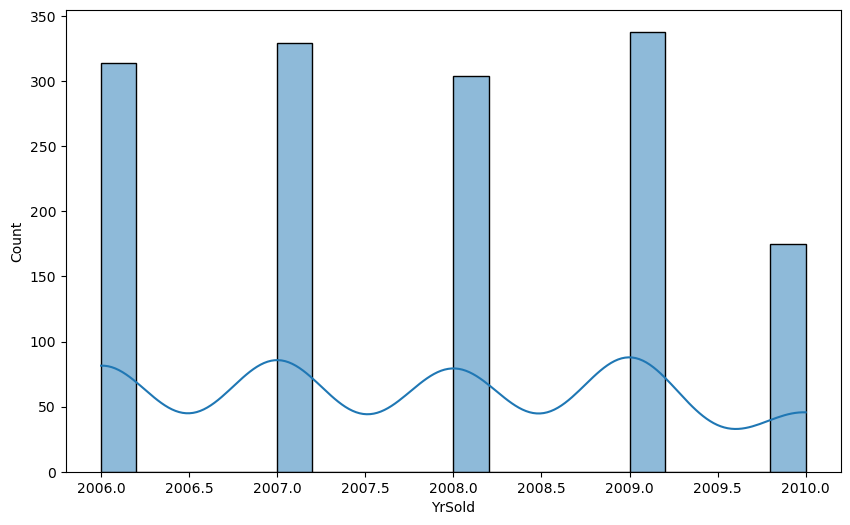

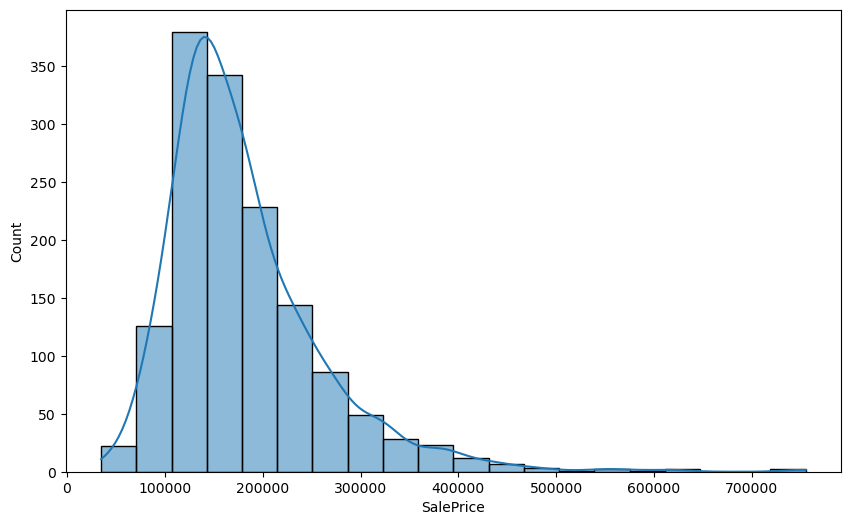

In [20]:
for i in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[i], kde=True, bins=20, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

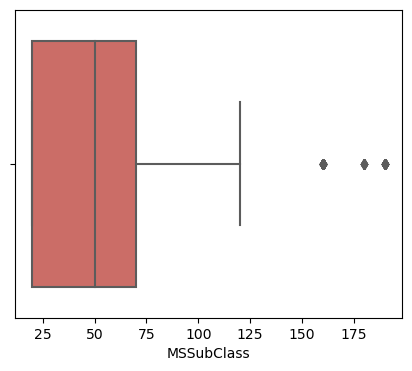

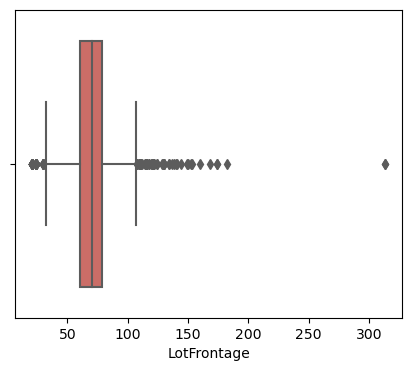

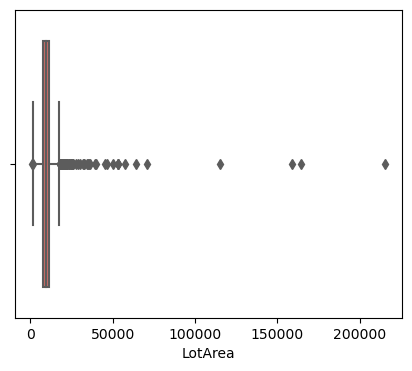

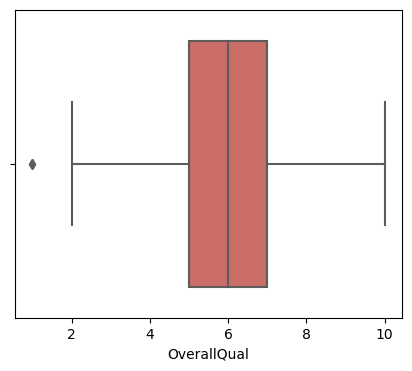

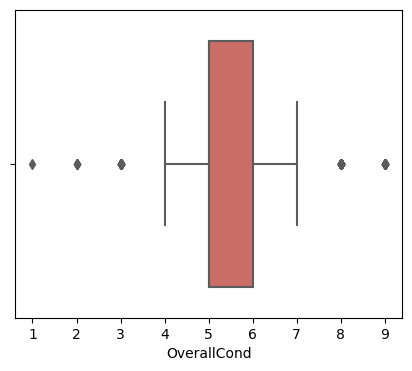

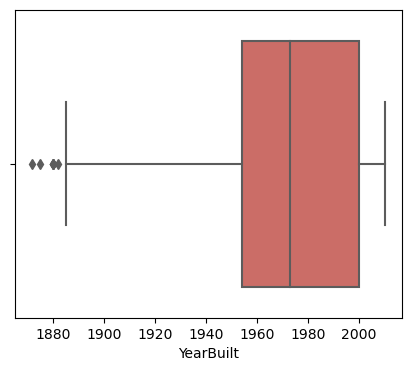

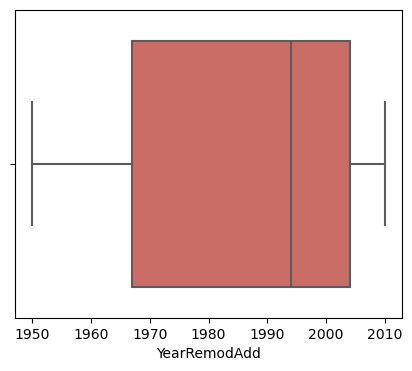

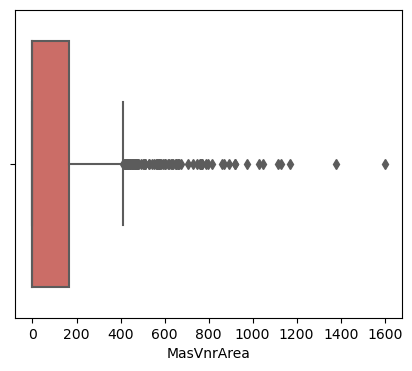

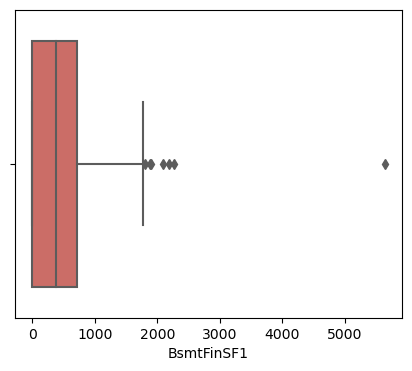

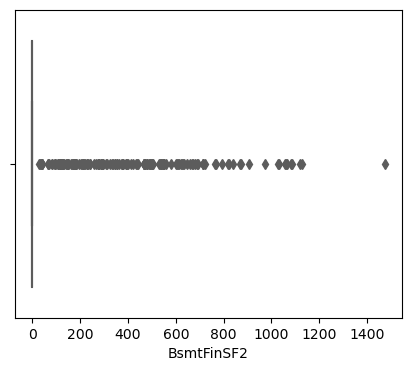

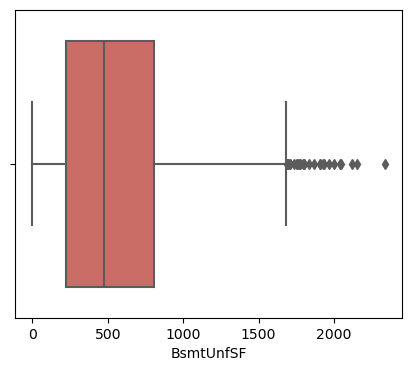

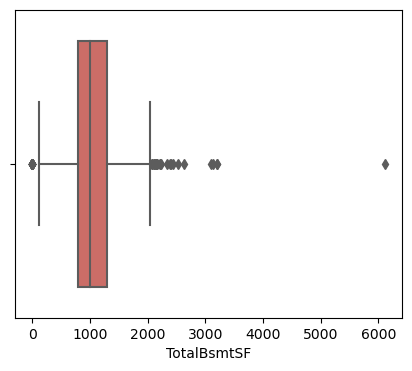

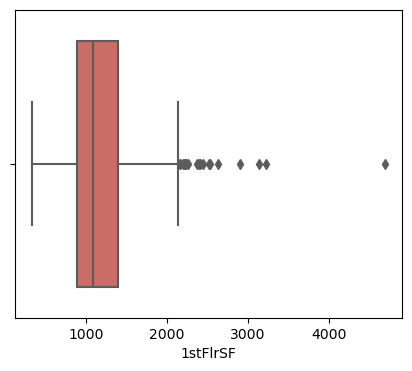

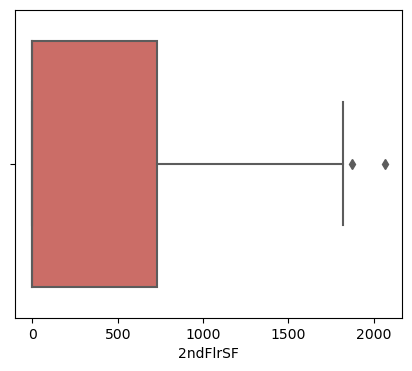

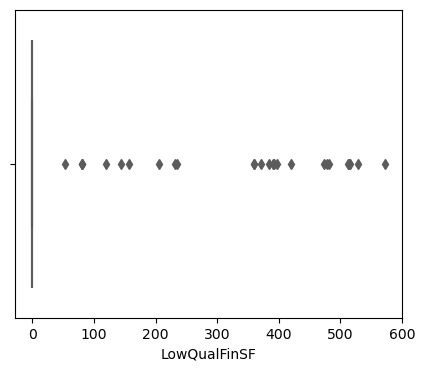

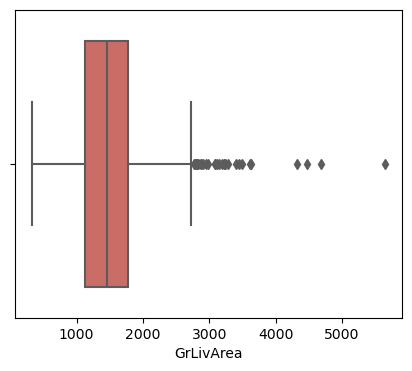

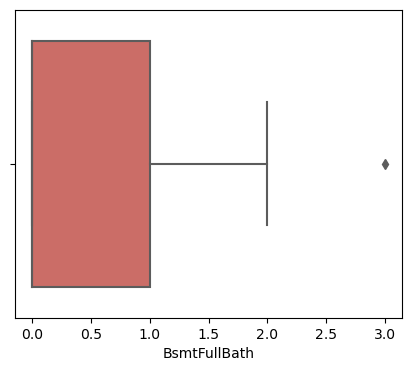

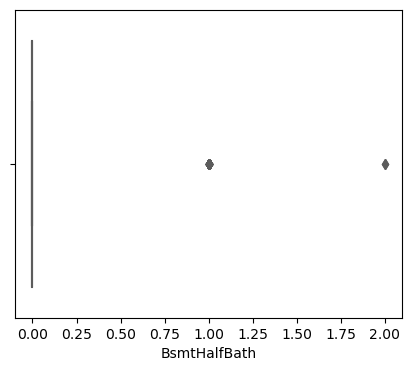

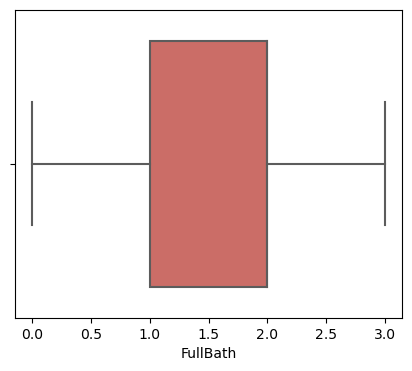

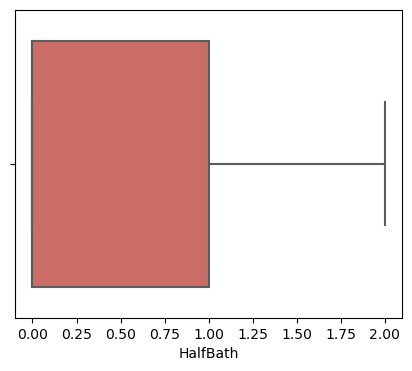

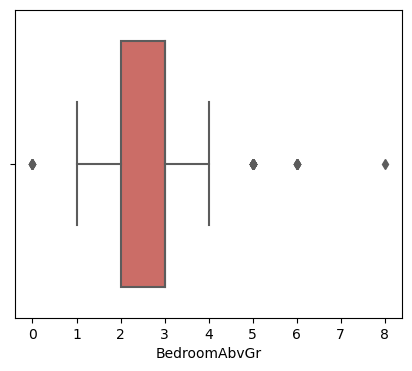

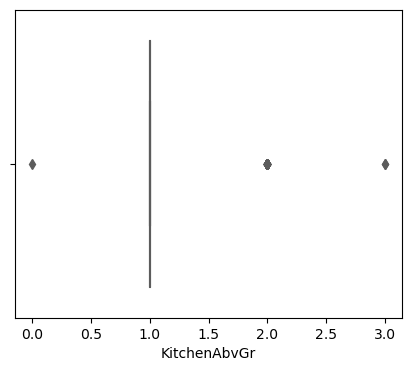

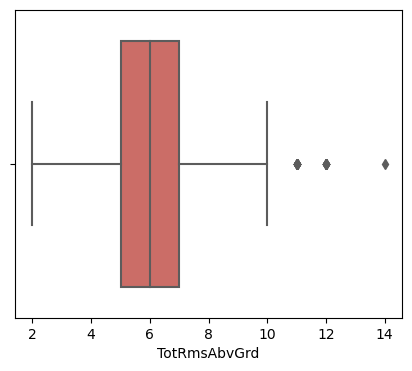

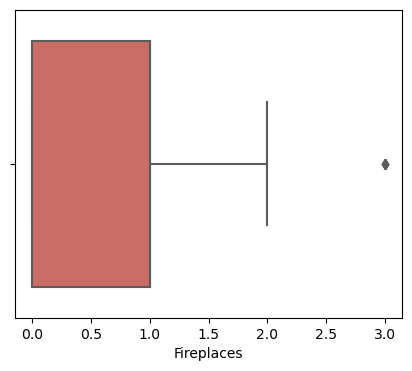

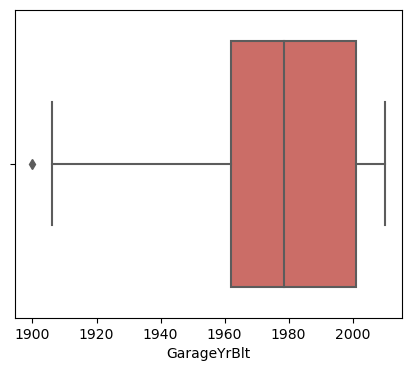

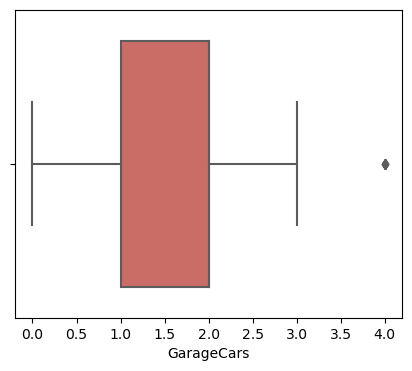

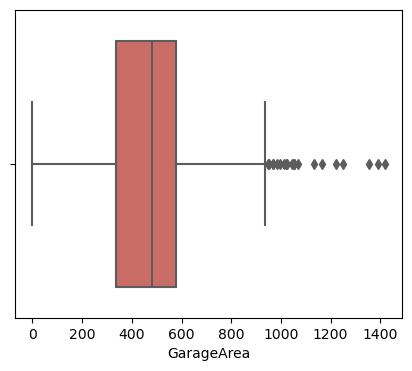

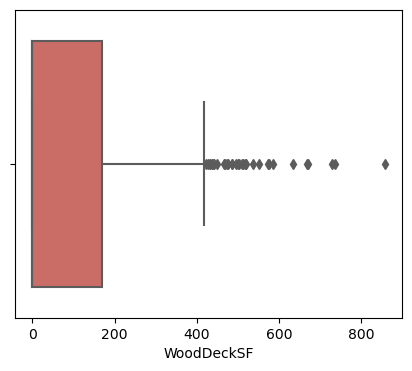

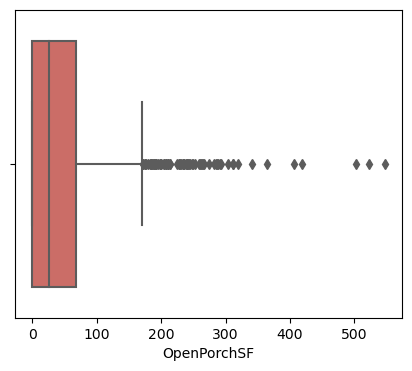

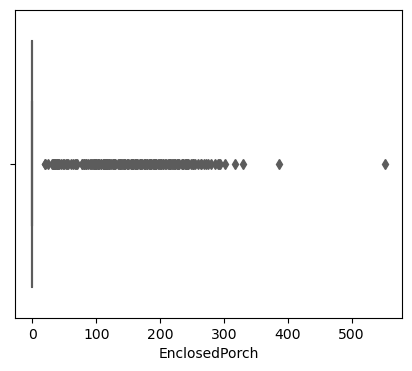

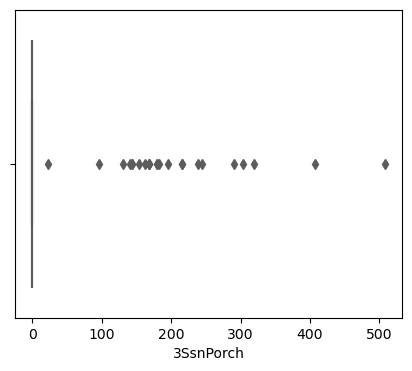

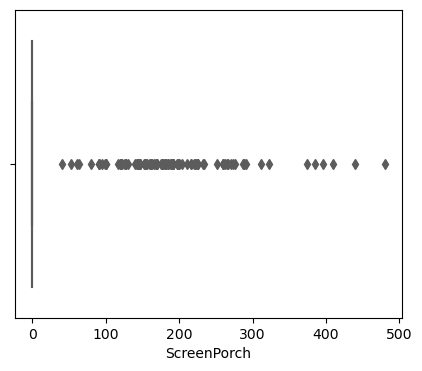

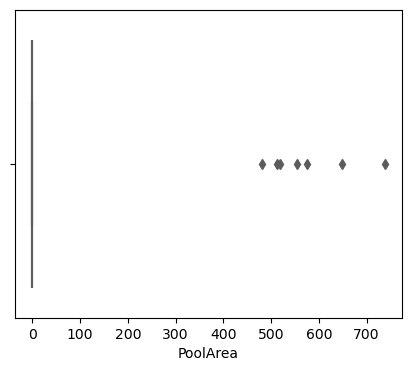

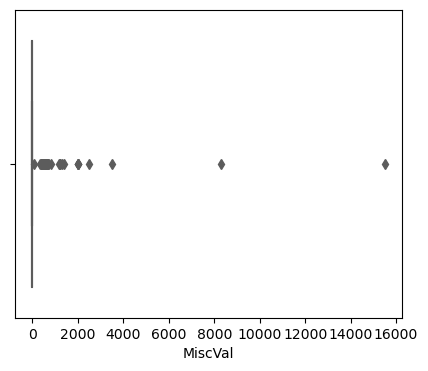

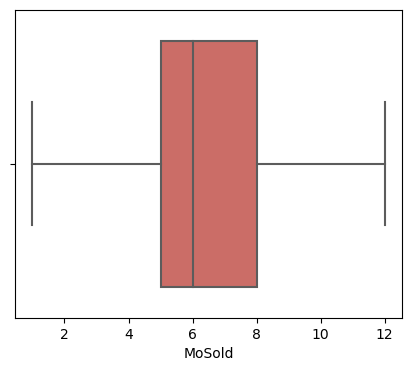

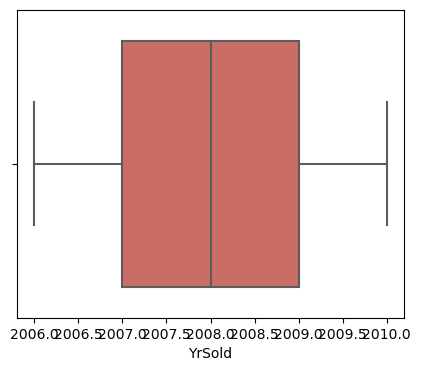

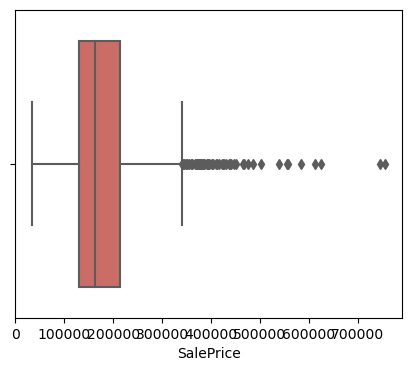

In [21]:
for i in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(df[i], data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

## Data Preprocessing

### Checking the distribution of target variable

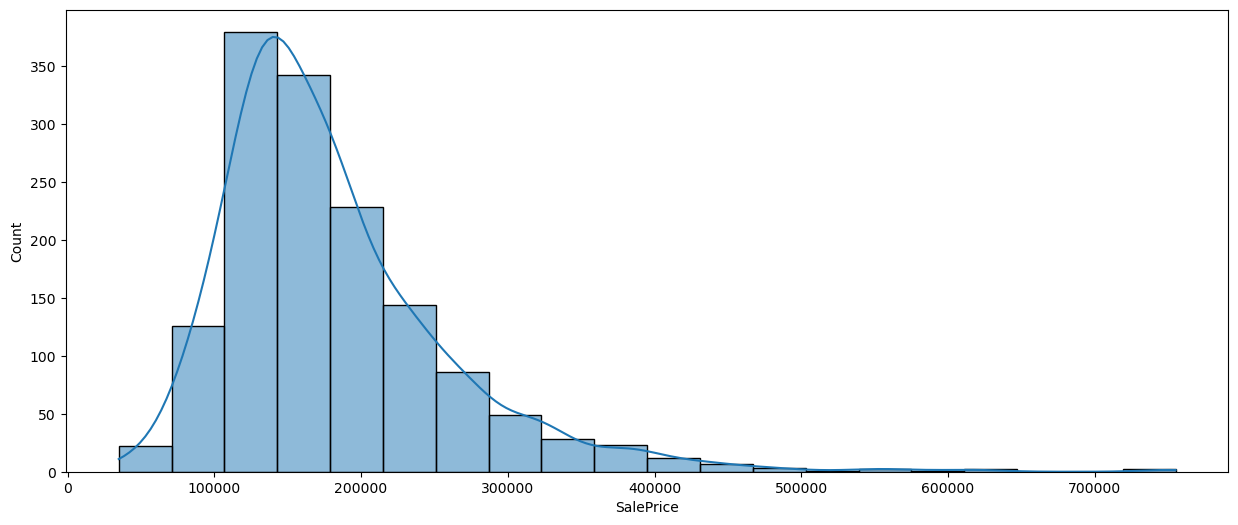

In [22]:
df1=df.copy()
plt.figure(figsize=(15,6))
sns.histplot(df1['SalePrice'], kde=True, bins=20, palette='hls')
plt.xticks(rotation=0)
plt.show()

### Converting into Normal distribution

In [23]:
df1['SalePrice']=np.log(df1['SalePrice'])

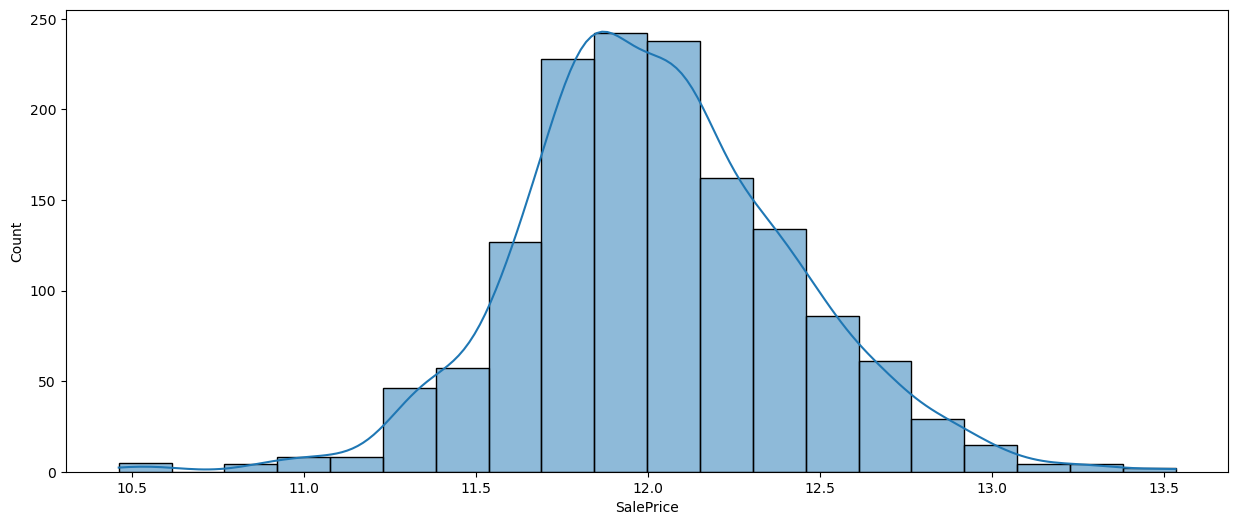

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(df1['SalePrice'], kde=True, bins=20, palette='hls')
plt.xticks(rotation=0)
plt.show()

### Handling Numerical Columns

In [25]:
numerical_columns = ['MSSubClass', 
                     'LotFrontage', 
                     'LotArea', 
                     'OverallQual', 
                     'OverallCond', 
                     'YearBuilt', 
                     'YearRemodAdd', 
                     'MasVnrArea', 
                     'BsmtFinSF1', 
                     'BsmtFinSF2', 
                     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [26]:
skewness=df1[numerical_columns].skew()
skewed_columns=skewness[(skewness>1) | (skewness<-1)]
print(skewed_columns)

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
dtype: float64


In [27]:
skew_features=skewed_columns.index.to_list()
skew_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [28]:
for feature in skew_features:
    df1[feature]=np.log1p(df1[feature])

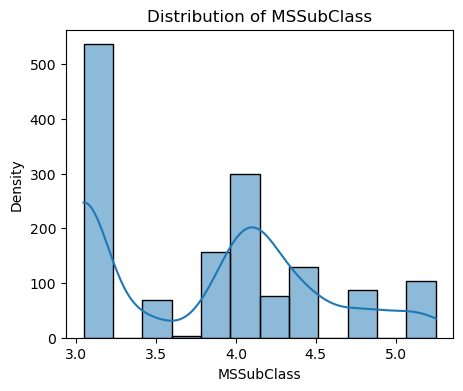

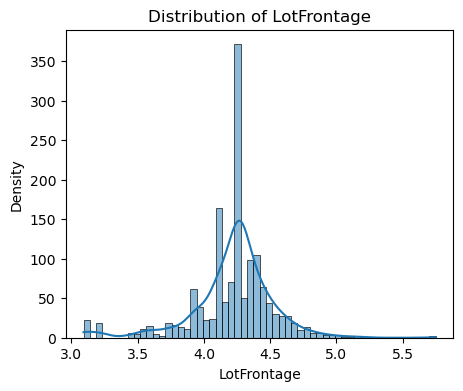

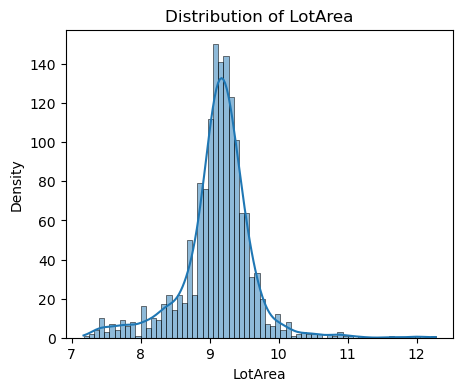

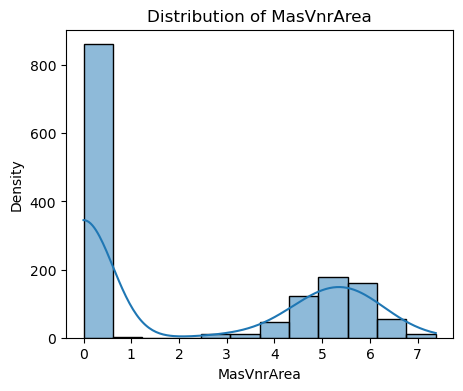

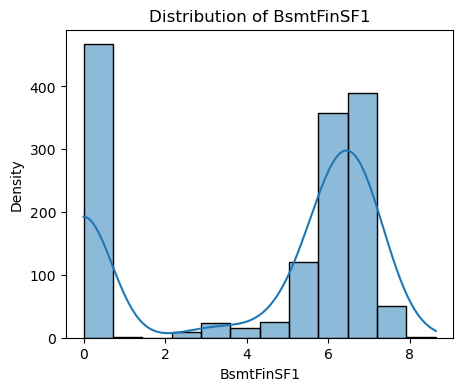

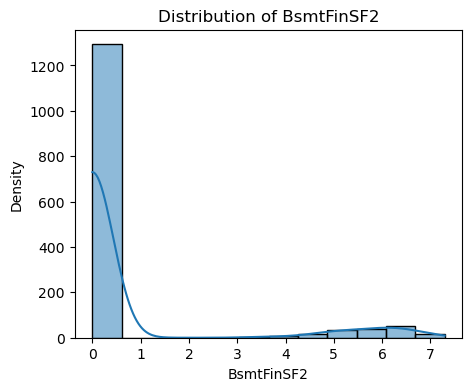

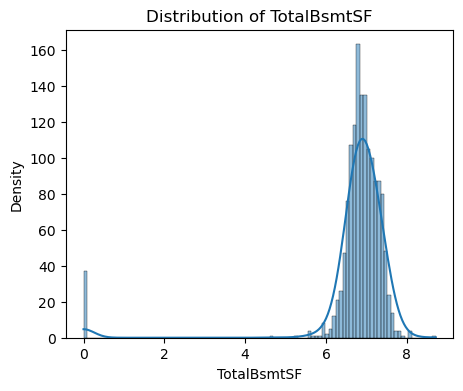

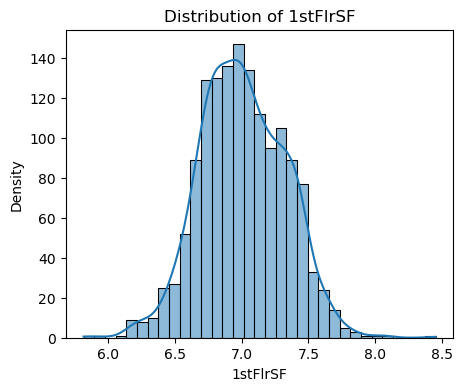

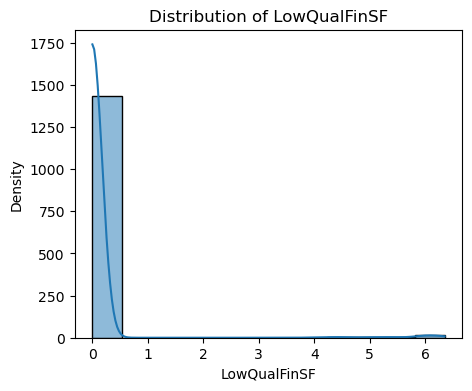

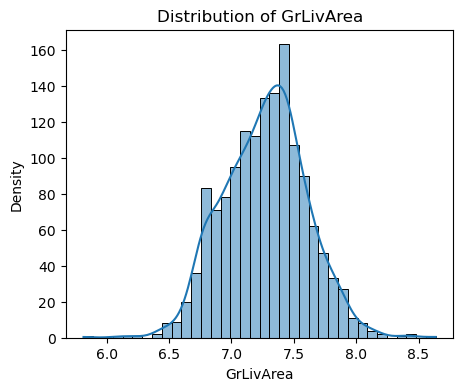

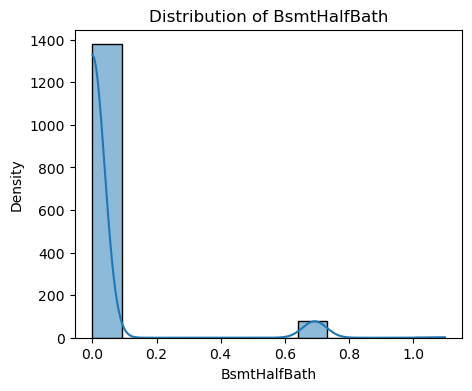

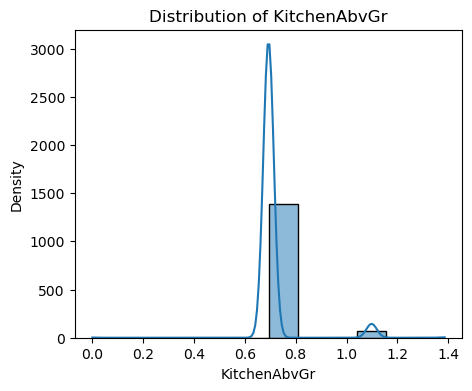

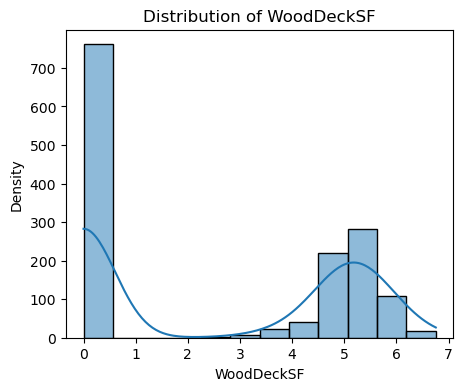

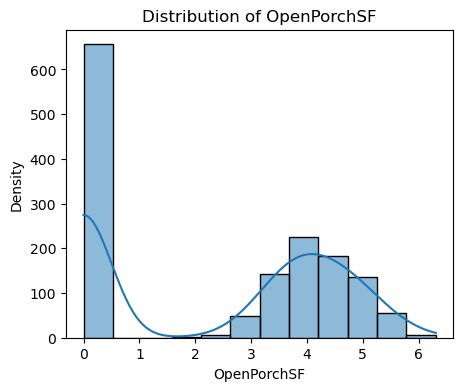

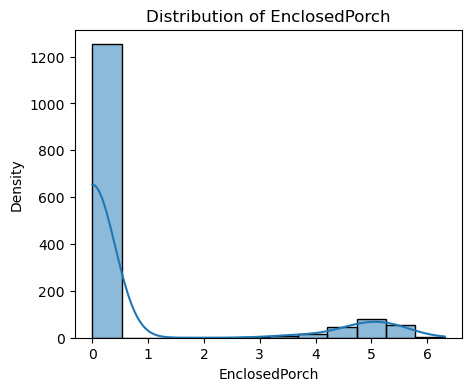

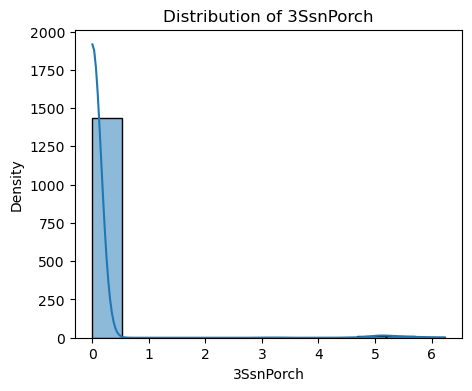

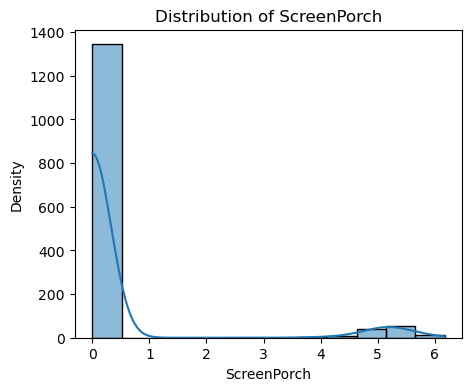

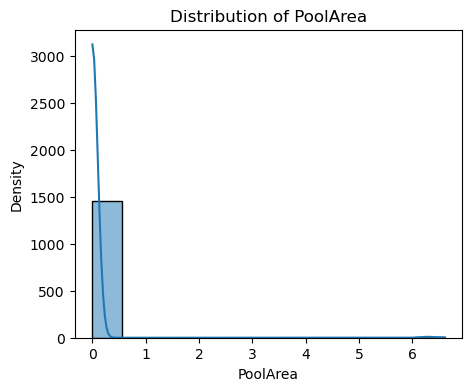

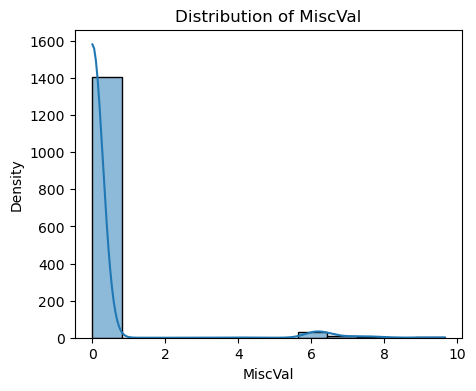

In [29]:
for feature in skew_features:
    plt.figure(figsize=(5,4))
    sns.histplot(df1[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

### Handling Categorical Coluumns

In [30]:
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

In [31]:
df1.sample(5)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
733    3.044522     4.394449  9.210440            5            6       1961   
382    4.110874     4.382027  9.131946            7            5       2006   
135    3.044522     4.394449  9.249657            7            6       1970   
996    3.044522     4.263383  9.274254            5            6       1961   
346    3.044522     4.263383  9.455089            6            8       1960   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
733          1983    0.000000    6.388561         0.0        270     6.762730   
382          2006    0.000000    0.000000         0.0        939     6.845880   
135          1970    5.666427    0.000000         0.0       1304     7.173958   
996          1961    0.000000    6.820016         0.0        135     6.957497   
346          1998    0.000000    6.212606         0.0        460     6.865891   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
733  7.043160         0           0.0   7.043160             1           0.0   
382  6.845880       858           0.0   7.494430             0           0.0   
135  7.428333         0           0.0   7.428333             0           0.0   
996  6.957497         0           0.0   6.957497             1           0.0   
346  6.865891         0           0.0   6.865891             0           0.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
733         1         0             3      0.693147             6           1   
382         2         1             3      0.693147             8           0   
135         2         0             3      0.693147             7           1   
996         1         0             3      0.693147             6           0   
346         1         0             2      0.693147             5           0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
733       1961.0           1         264    5.111988     0.000000   
382       2006.0           2         639    4.976734     3.988984   
135       1970.0           2         530    4.595120     0.000000   
996       1961.0           1         368    0.000000     5.768321   
346       1960.0           1         301    0.000000     0.000000   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  MoSold  \
733            0.0        0.0          0.0       0.0  5.993961       3   
382            0.0        0.0          0.0       0.0  0.000000       4   
135            0.0        0.0          0.0       0.0  0.000000       5   
996            0.0        0.0          0.0       0.0  0.000000       1   
346            0.0        0.0          0.0       0.0  9.648660       4   

     YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
733    2009  11.786001            0            0            1            0   
382    2007  12.271392            0            0            1            0   
135    2008  12.066811            0            0            1            0   
996    2006  11.824080            0            0            1            0   
346    2007  11.928341            0            0            1            0   

     Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
733            1             0             0             1                0   
382            1             0             0             0                0   
135            1             0             0             1                0   
996            1             0             0             0                0   
346            1             0             0             0                0   

     LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  ...  \
733                0                1                  0              0  ...   
382                0                1                  0              0  ...   
135                0           

### Feature Selection 

In [32]:
correlation_threshold=0.5

In [33]:
corr1=df1.corr()

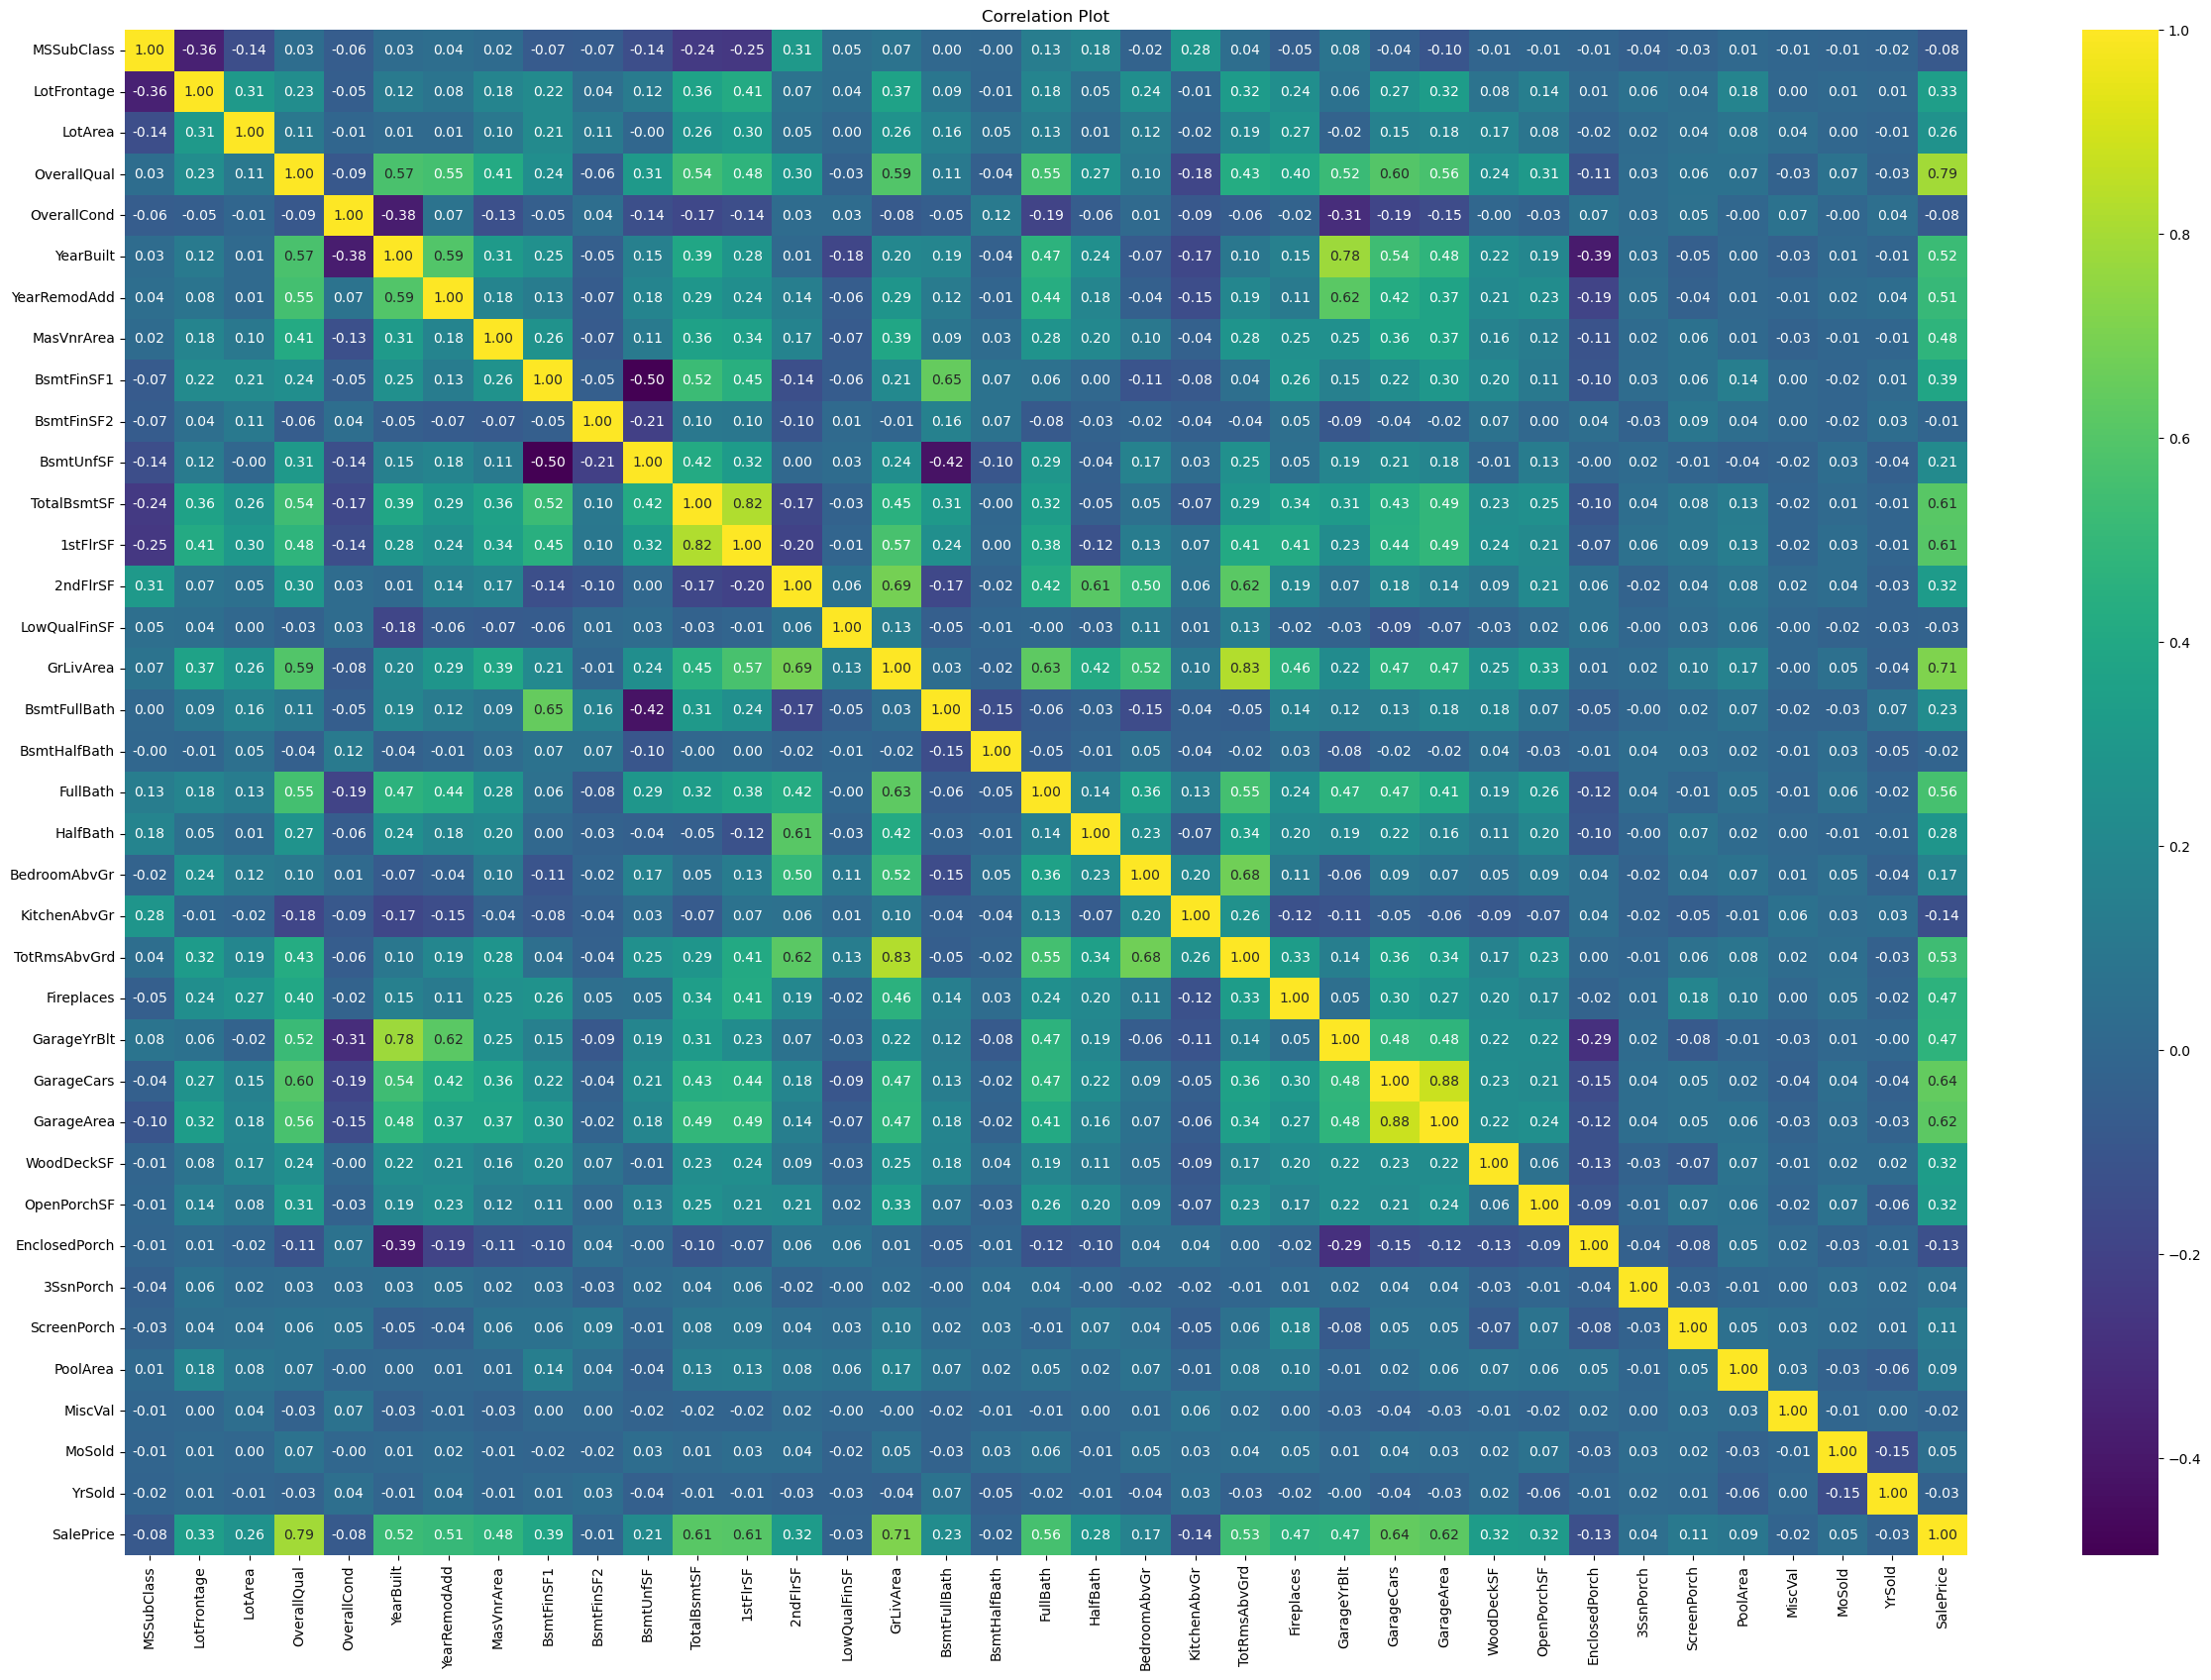

In [34]:
plt.figure(figsize=(30,20))
dataplot = sns.heatmap(df.corr(), cmap="viridis", annot=True, fmt=".2f")  
plt.title('Correlation Plot')
plt.show()

In [35]:
good_features=corr1[corr1['SalePrice'].abs() > correlation_threshold]['SalePrice'].index.tolist()

In [36]:
good_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'KitchenQual_TA']

In [37]:
df2=df1[good_features]

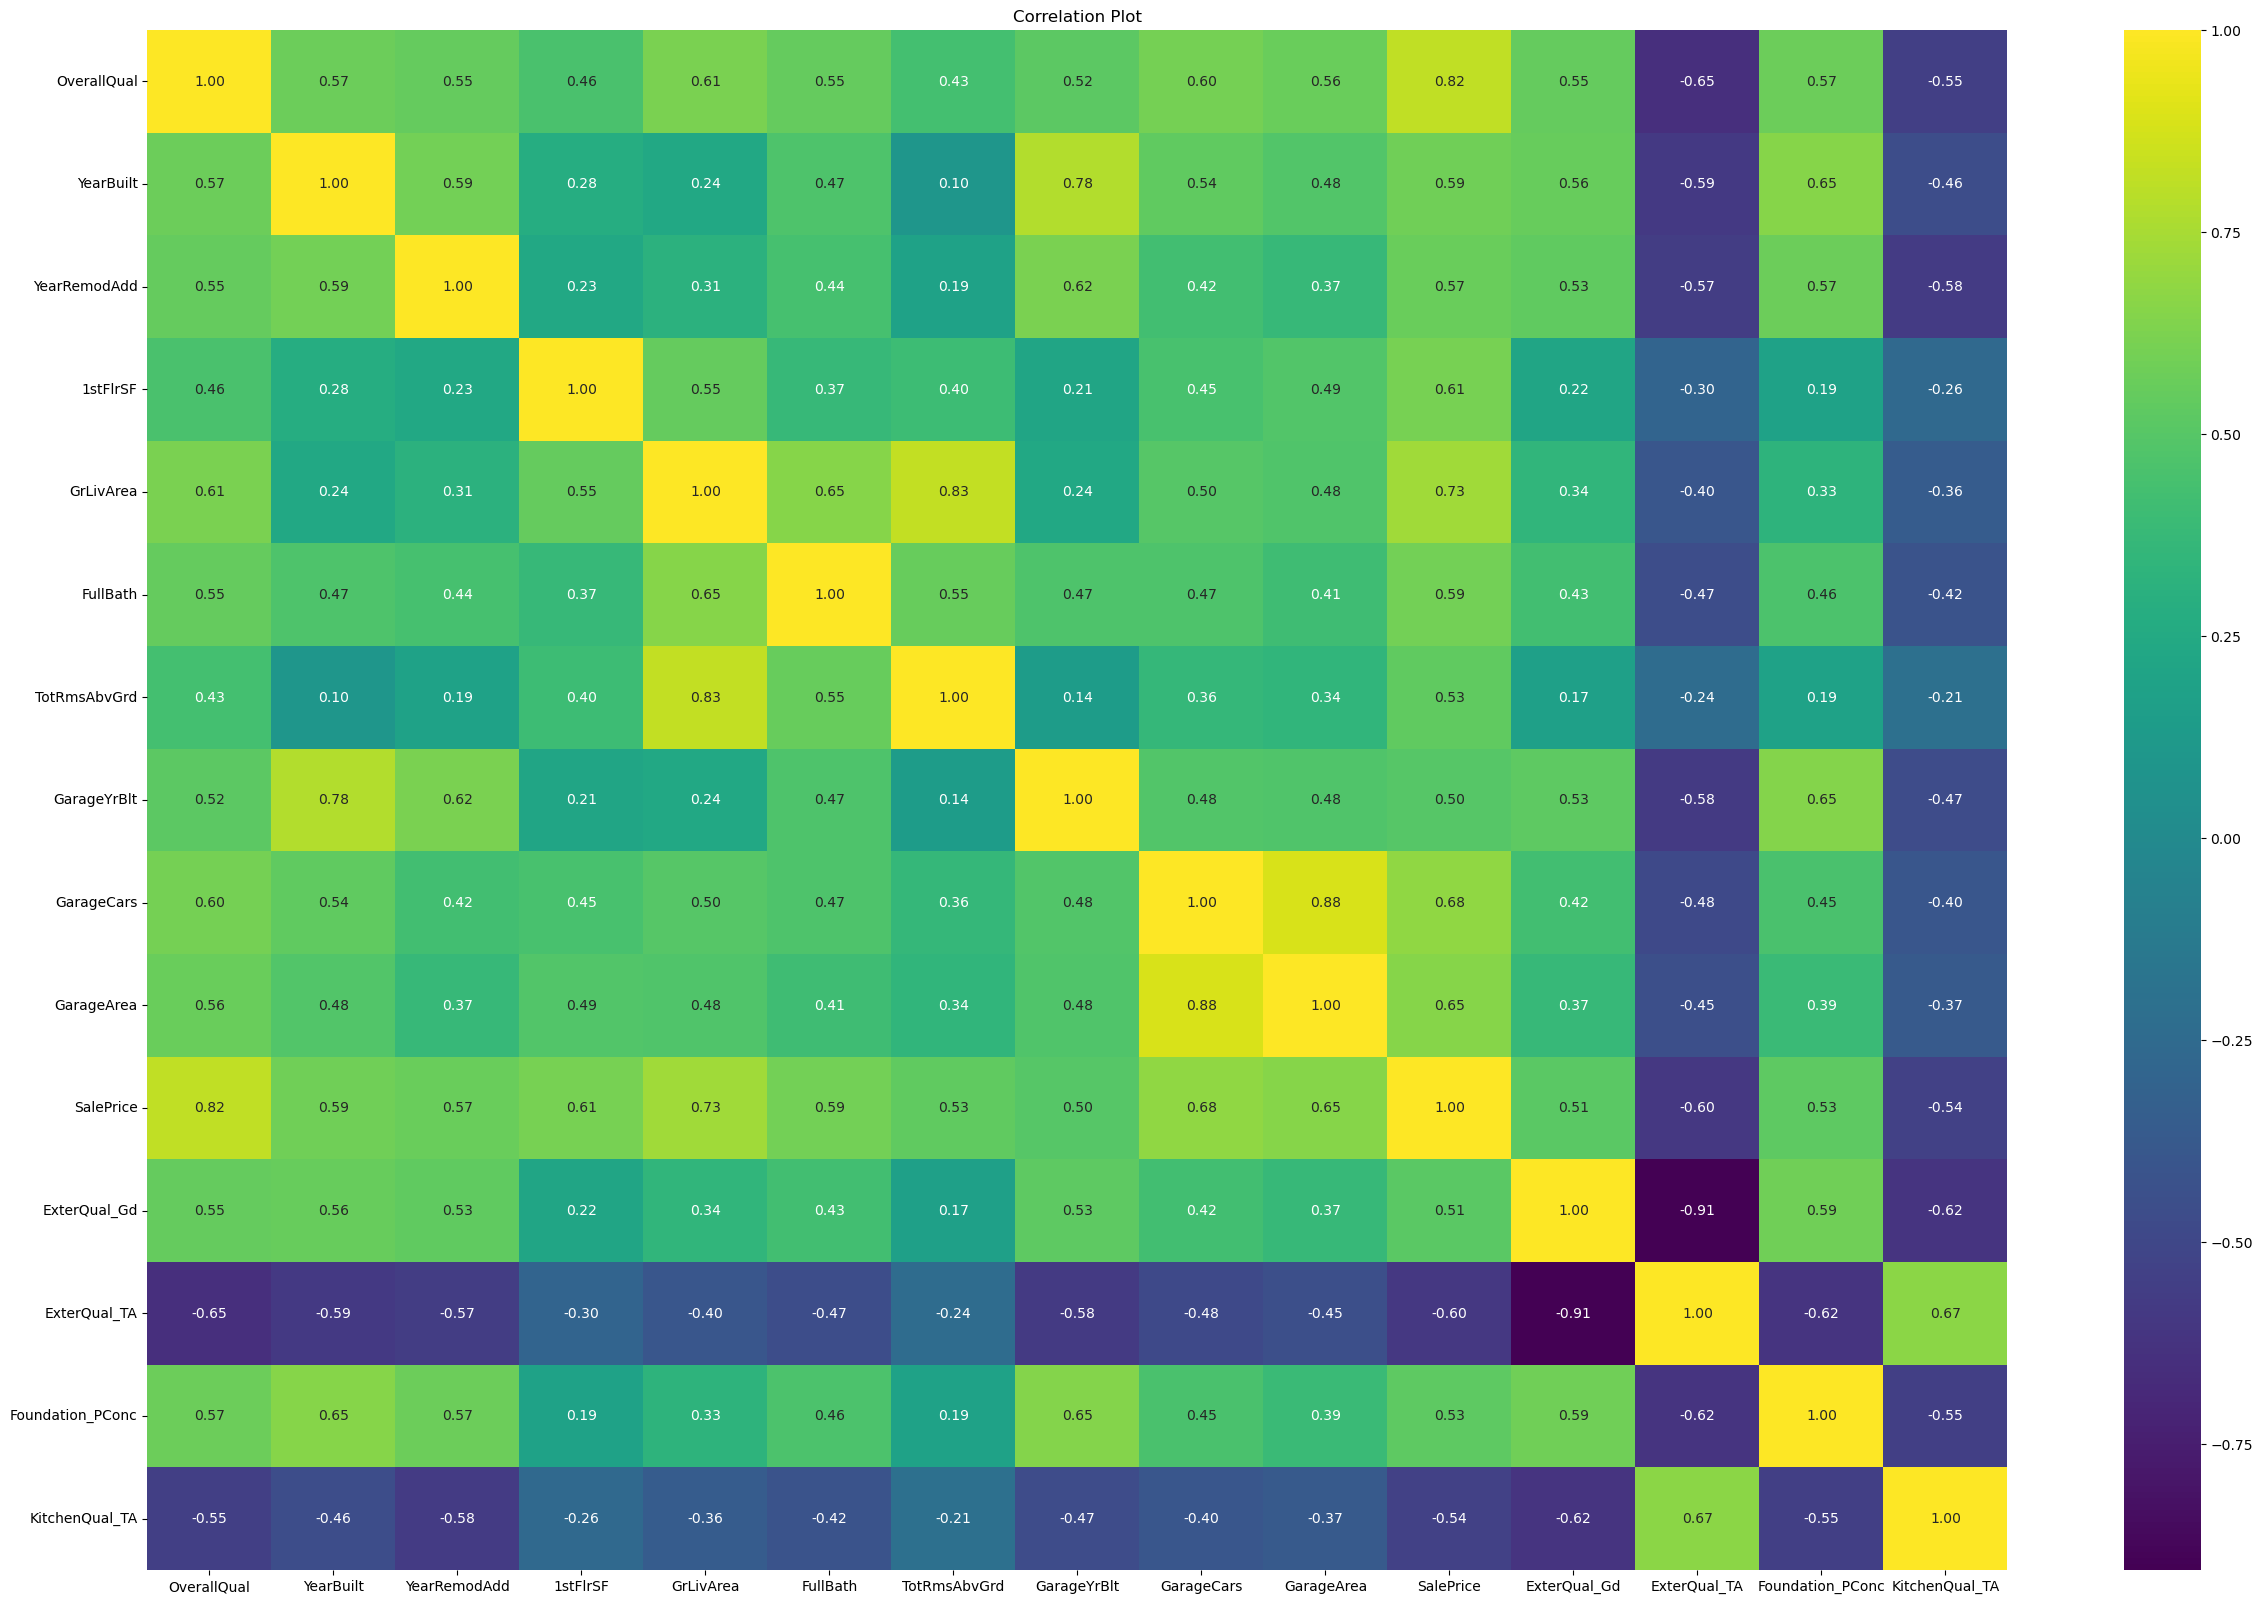

In [38]:
plt.figure(figsize=(30,20))
dataplot = sns.heatmap(df2.corr(), cmap="viridis", annot=True, fmt=".2f")  
plt.title('Correlation Plot')
plt.show()

###  Model building

In [39]:
X=df2.drop(['SalePrice'],axis=1)
y=df2['SalePrice']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred=reg_model.predict(X_test)

### Evaluating the predictions

In [43]:
mse, mae ,r2= mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test), r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}\tMean Absolute Error: {mae} \tR2 score: {r2}\n\n')

Mean Squared Error: 0.02939191185092193	Mean Absolute Error: 0.11915828204011822 	R2 score: 0.8424984849603547




### Testing the model with user inputs

In [44]:
#Testing via customized input
user_inputs=[]
features=['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'KitchenQual_TA']
for feature in features:
    user_input=input(f"Enter value for {feature}:")
    user_inputs.append(user_input)
user_data=pd.DataFrame([user_inputs],columns=features)
prediction=reg_model.predict(user_data)
prediction[0]


Enter value for OverallQual:8
Enter value for YearBuilt:2008
Enter value for YearRemodAdd:2008
Enter value for 1stFlrSF:3
Enter value for GrLivArea:6
Enter value for FullBath:4
Enter value for TotRmsAbvGrd:7
Enter value for GarageYrBlt:2006
Enter value for GarageCars:4
Enter value for GarageArea:8
Enter value for ExterQual_Gd:2
Enter value for ExterQual_TA:3
Enter value for Foundation_PConc:4
Enter value for KitchenQual_TA:5


10.755014779890887